In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('USA_Housing.csv')
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [7]:
import re
state_regex = re.compile(r'\b[A-Z]{2}\b')
state_regex.findall(df['Address'][4])

['AE']

In [8]:
state_initials = df['Address'].apply(lambda x: re.search(r'\b[A-Z]{2}\b', x).group())
df['state'] = state_initials

In [9]:
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address state  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...    NE  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...    CA  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...    WI  
3                          USS Barnett\nFPO AP 44820    AP  
4                         USNS Raymond\nFPO AE 09386    AE

In [10]:
for i in df.columns:
    print(i,':', df[i].nunique())

Avg. Area Income : 5000
Avg. Area House Age : 5000
Avg. Area Number of Rooms : 5000
Avg. Area Number of Bedrooms : 255
Area Population : 5000
Price : 5000
Address : 5000
state : 62


In [11]:
df.Price.apply(float).round(2)

0       1059033.56
1       1505890.91
2       1058987.99
3       1260616.81
4        630943.49
           ...    
4995    1060193.79
4996    1482617.73
4997    1030729.58
4998    1198656.87
4999    1298950.48
Name: Price, Length: 5000, dtype: float64

In [12]:
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address state  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...    NE  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...    CA  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...    WI  
3                          USS Barnett\nFPO AP 44820    AP  
4                         USNS Raymond\nFPO AE 09386    AE

In [13]:
for i in df.columns:
    print('\n',i,':', df[i].nunique())


 Avg. Area Income : 5000

 Avg. Area House Age : 5000

 Avg. Area Number of Rooms : 5000

 Avg. Area Number of Bedrooms : 255

 Area Population : 5000

 Price : 5000

 Address : 5000

 state : 62


In [14]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

In [15]:
plt.rcParams.update(plt.rcParamsDefault)

In [16]:
plt.style.use('dark_background')

In [17]:
df.drop('Address', axis = 1, inplace = True)

In [18]:
df.columns = ['Income', 'House Age', 'Number of Rooms', 'Number of Bedrooms', 'Area Population', 'Price', 'State']

In [19]:
df.head()

Income  House Age  Number of Rooms  Number of Bedrooms  \
0  79545.458574   5.682861         7.009188                4.09   
1  79248.642455   6.002900         6.730821                3.09   
2  61287.067179   5.865890         8.512727                5.13   
3  63345.240046   7.188236         5.586729                3.26   
4  59982.197226   5.040555         7.839388                4.23   

   Area Population         Price State  
0     23086.800503  1.059034e+06    NE  
1     40173.072174  1.505891e+06    CA  
2     36882.159400  1.058988e+06    WI  
3     34310.242831  1.260617e+06    AP  
4     26354.109472  6.309435e+05    AE

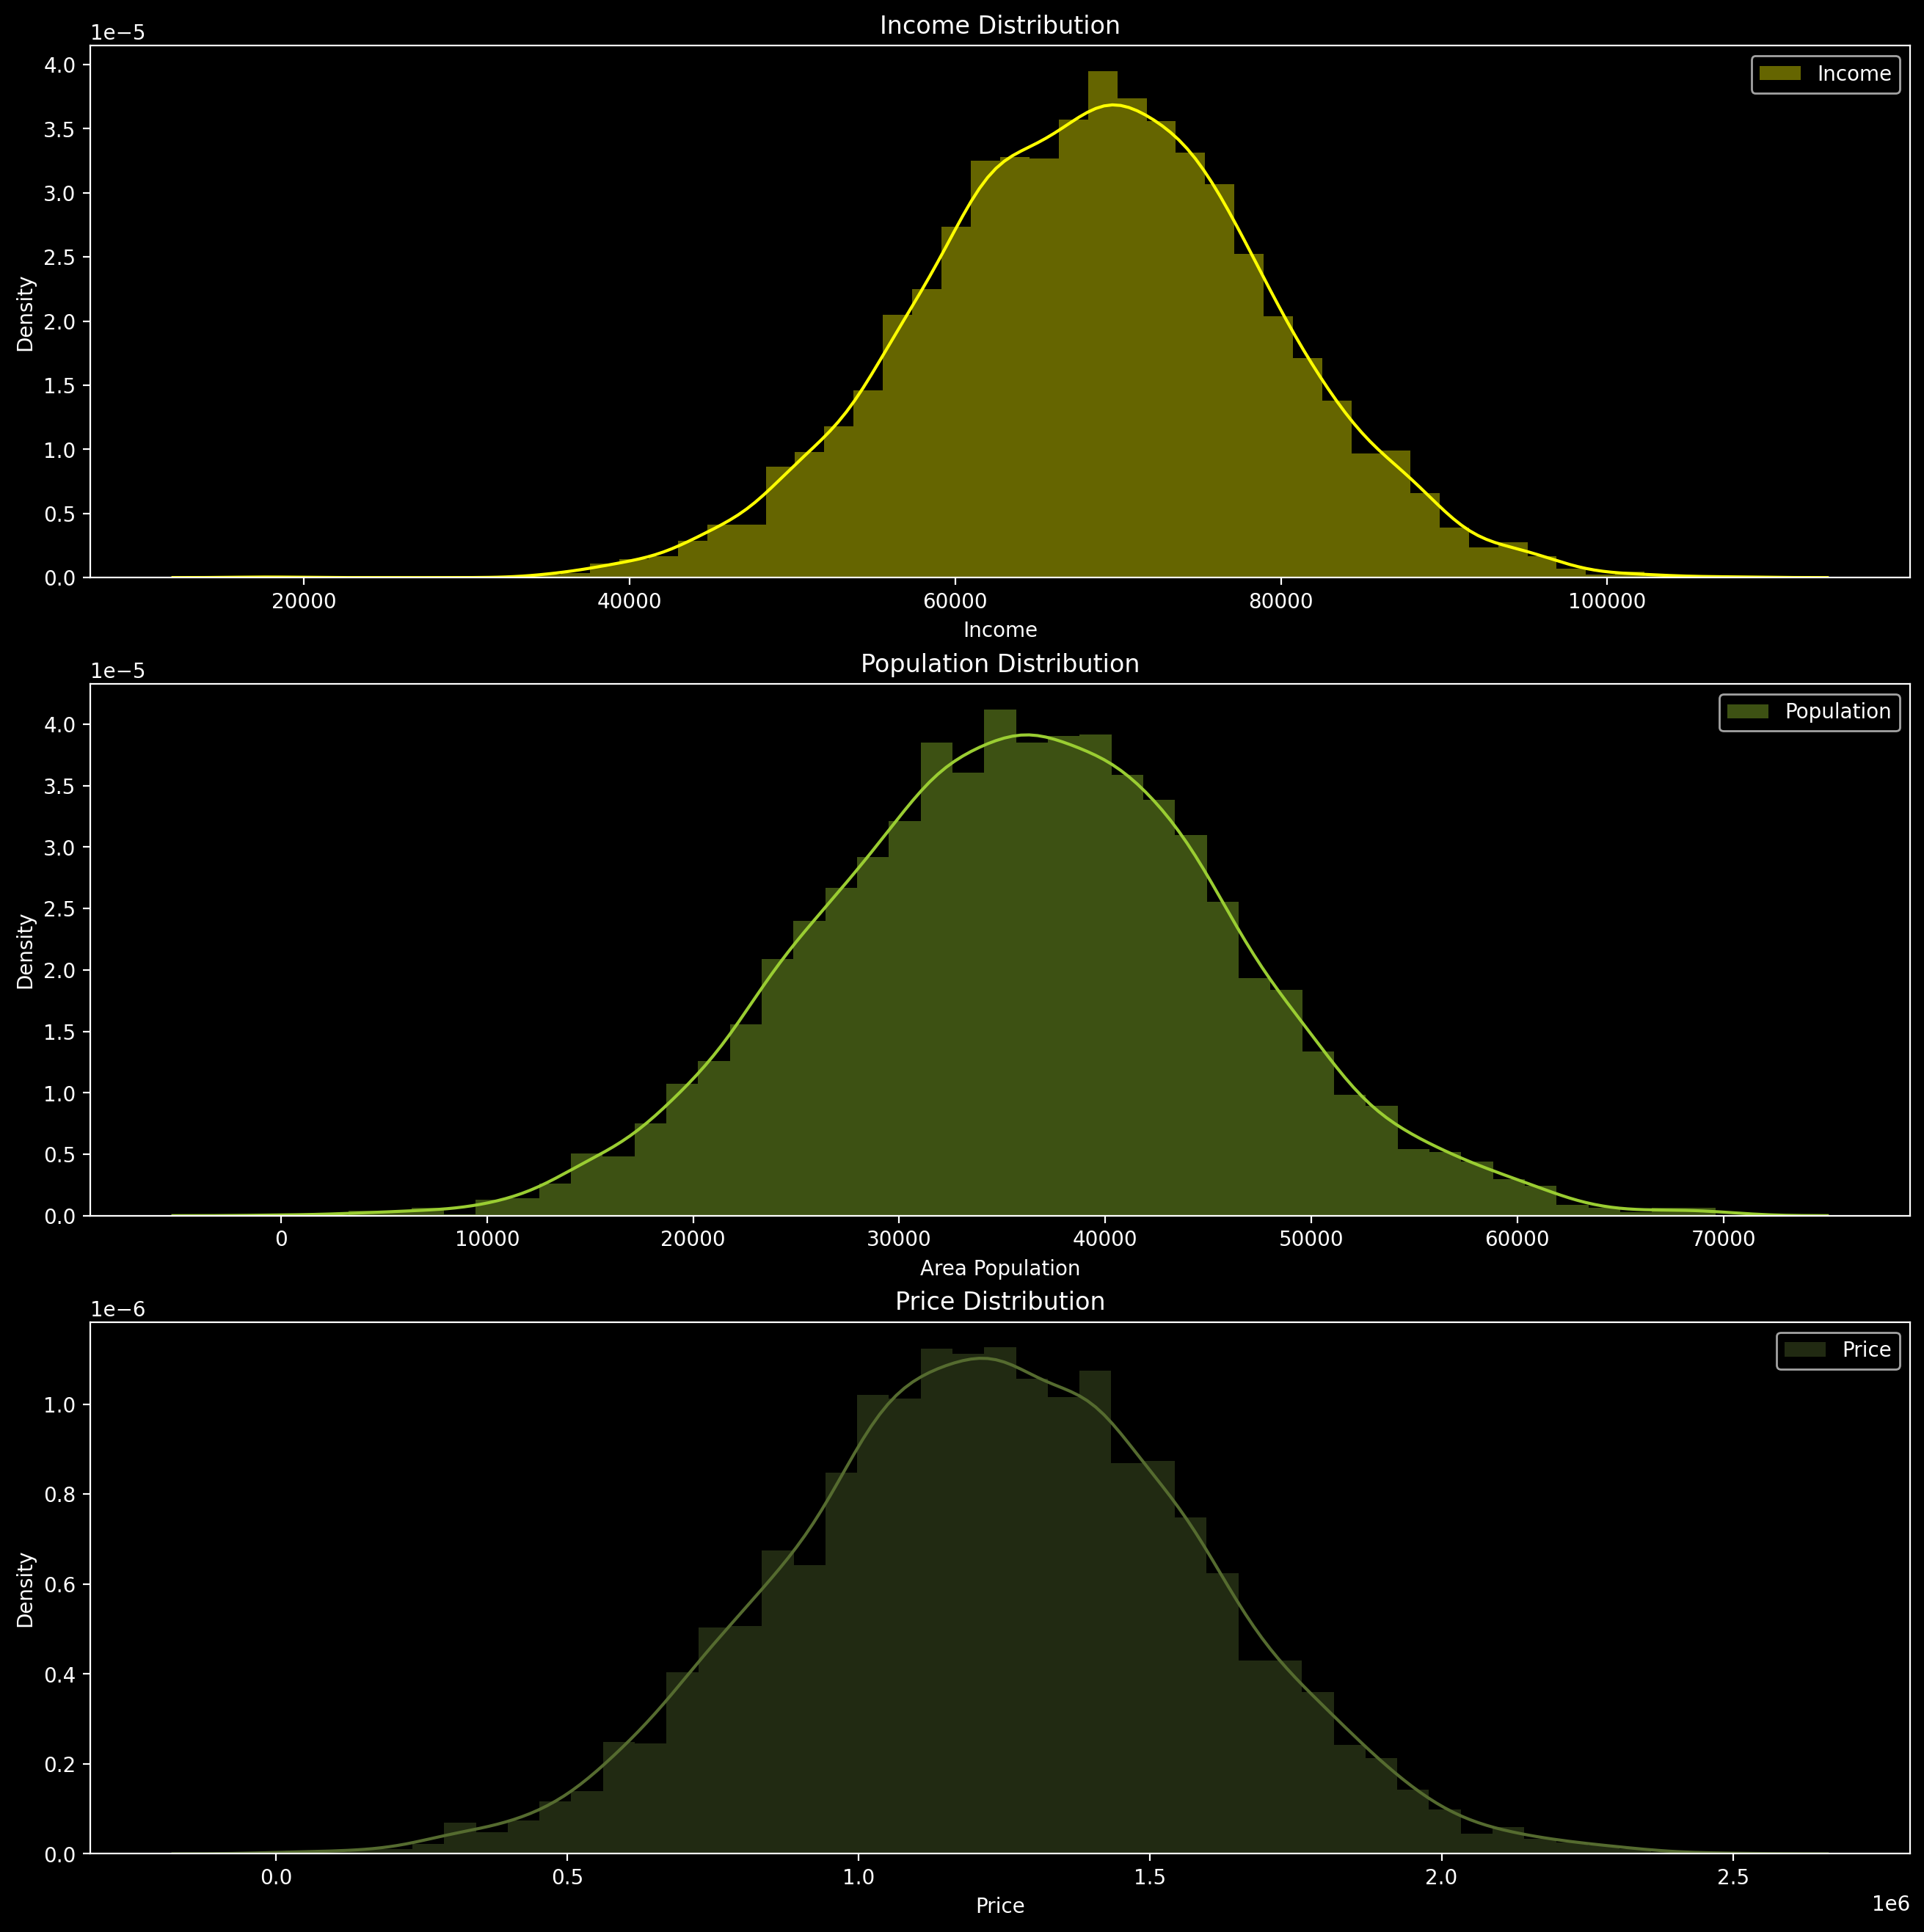

In [20]:
# Income
plt.figure(figsize = (16, 16), dpi = 200)
plt.subplot(3,1,1)
sns.distplot(df['Income'], label = 'Income', color = 'yellow', kde = True)
plt.title('Income Distribution')
plt.legend()

#Population
plt.subplot(3,1,2)
sns.distplot(df['Area Population'], label = 'Population', color = 'yellowgreen')
plt.title('Population Distribution')
plt.legend()

# Price
plt.subplot(3,1,3)
sns.distplot(df['Price'], label = 'Price', color = 'darkolivegreen')
plt.title('Price Distribution')
plt.legend()

plt.show()

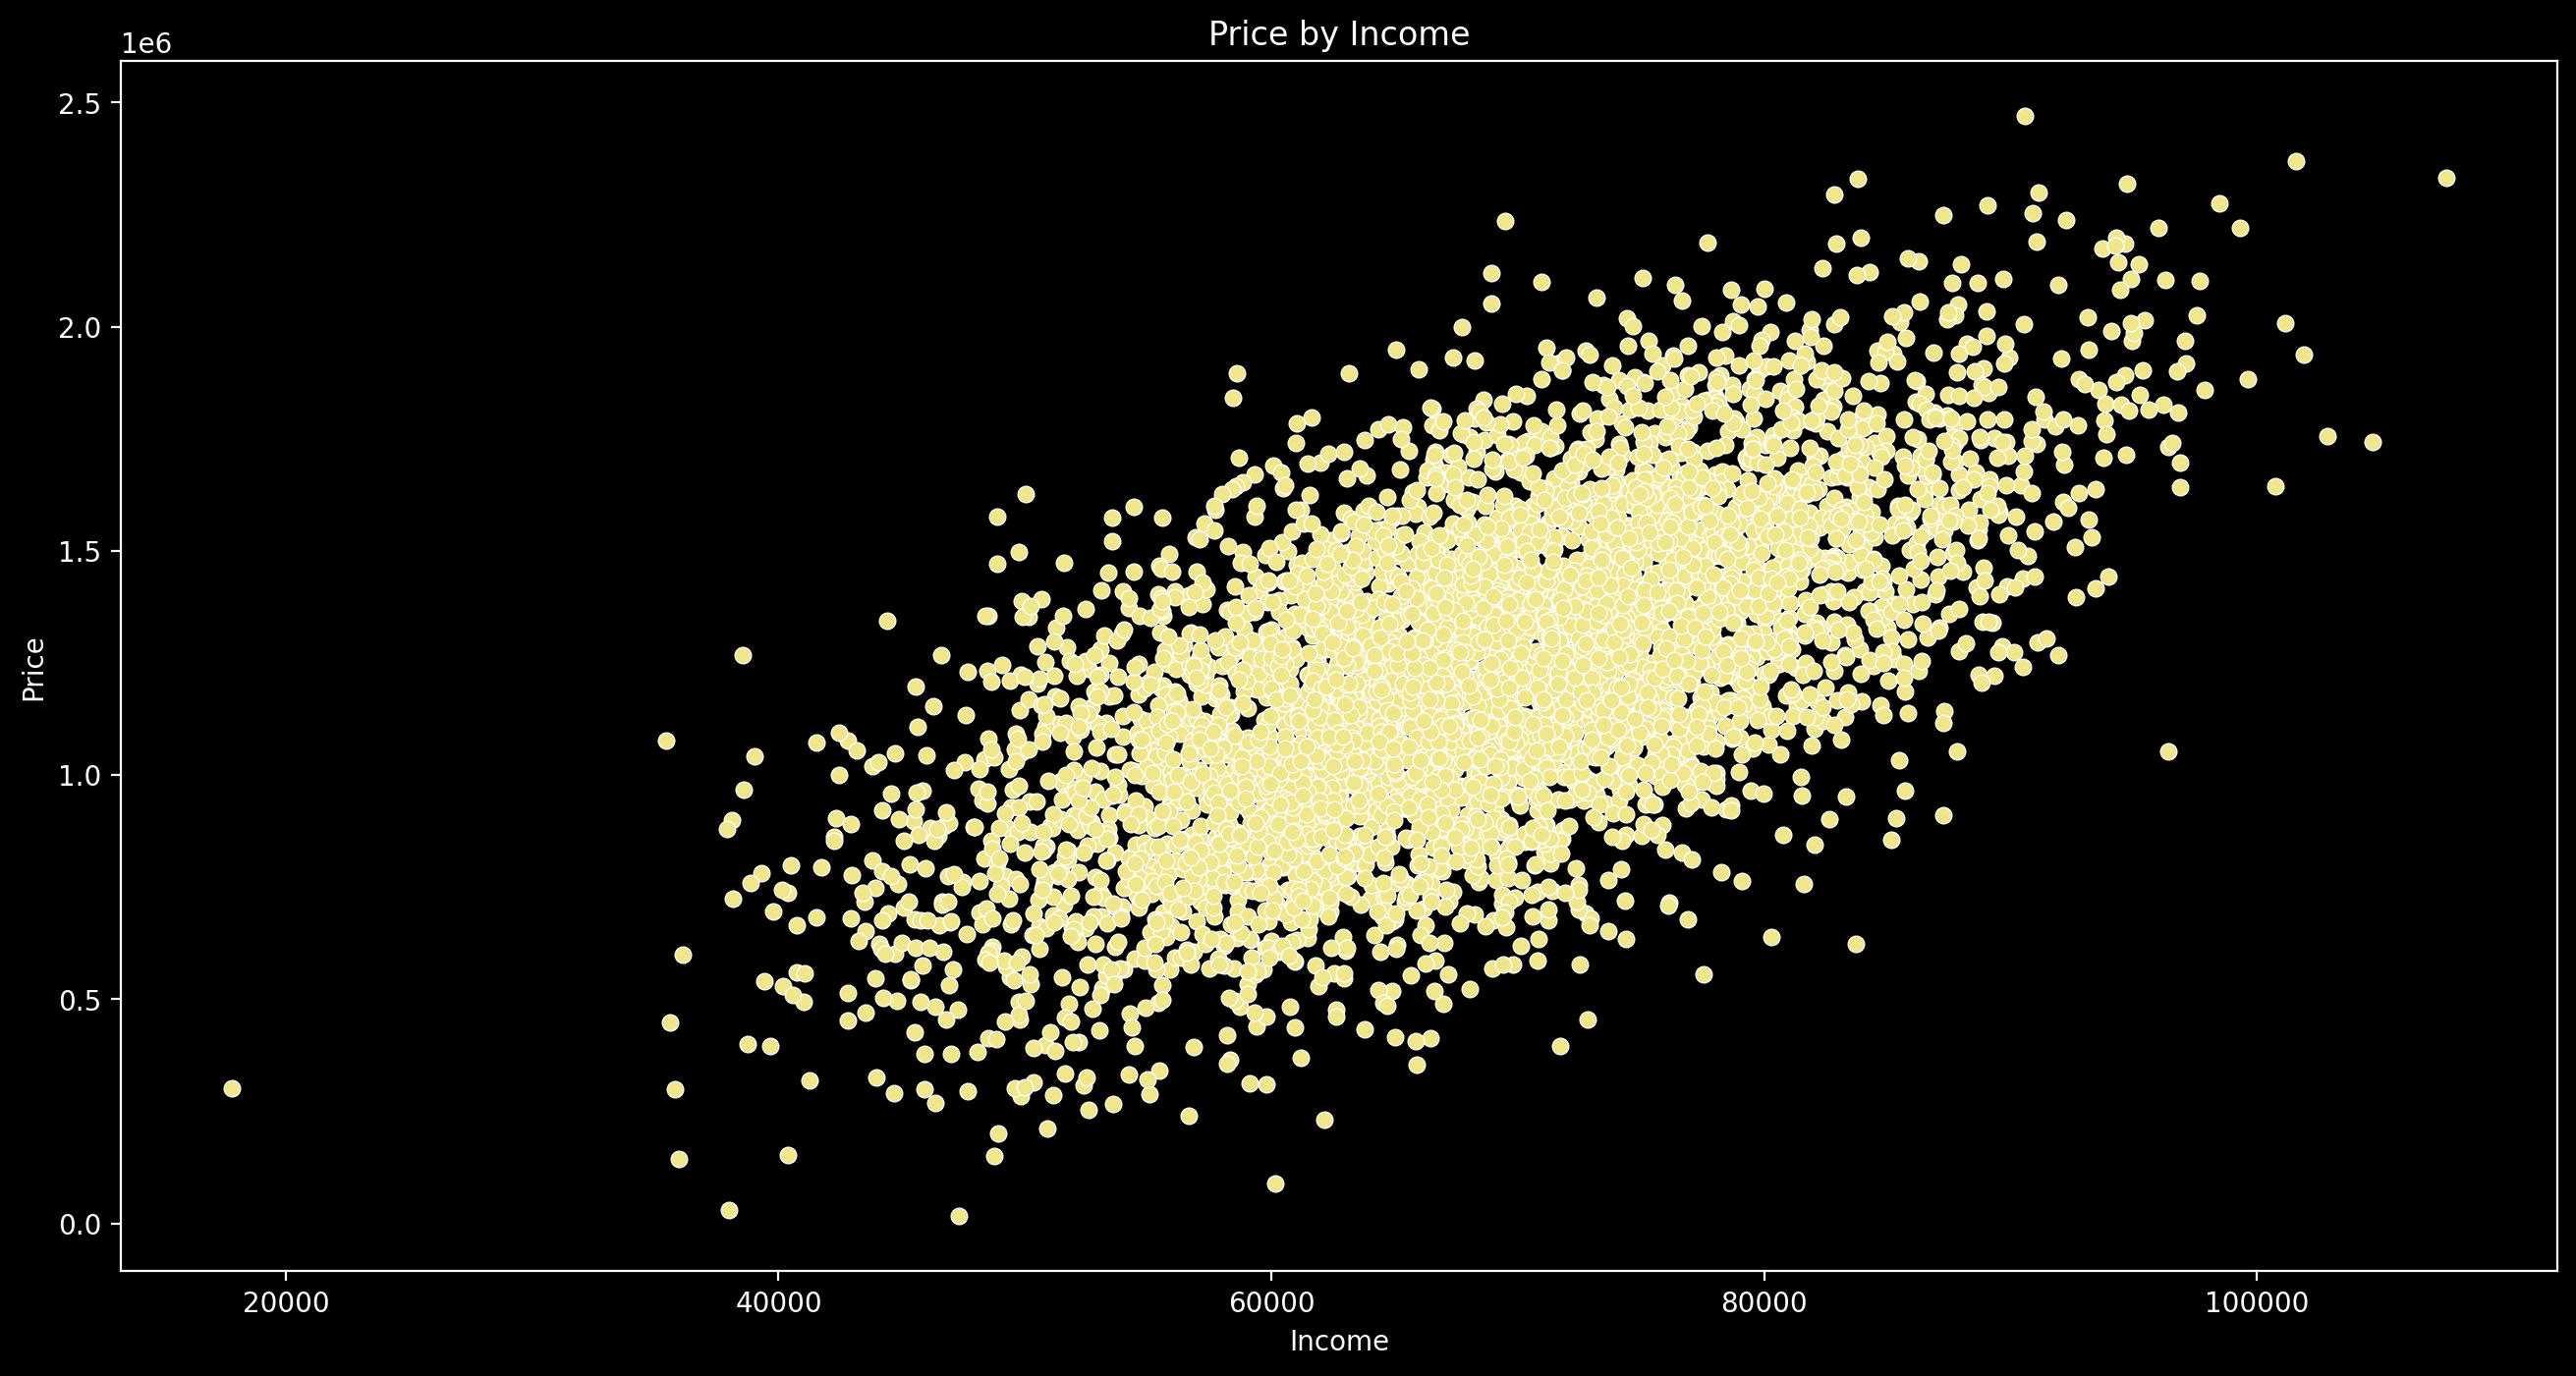

In [21]:
# Price by Income
plt.figure(figsize = (16, 8), dpi = 200)
sns.scatterplot('Income', 'Price', data = df, color = 'khaki' )
plt.title('Price by Income')
plt.show()

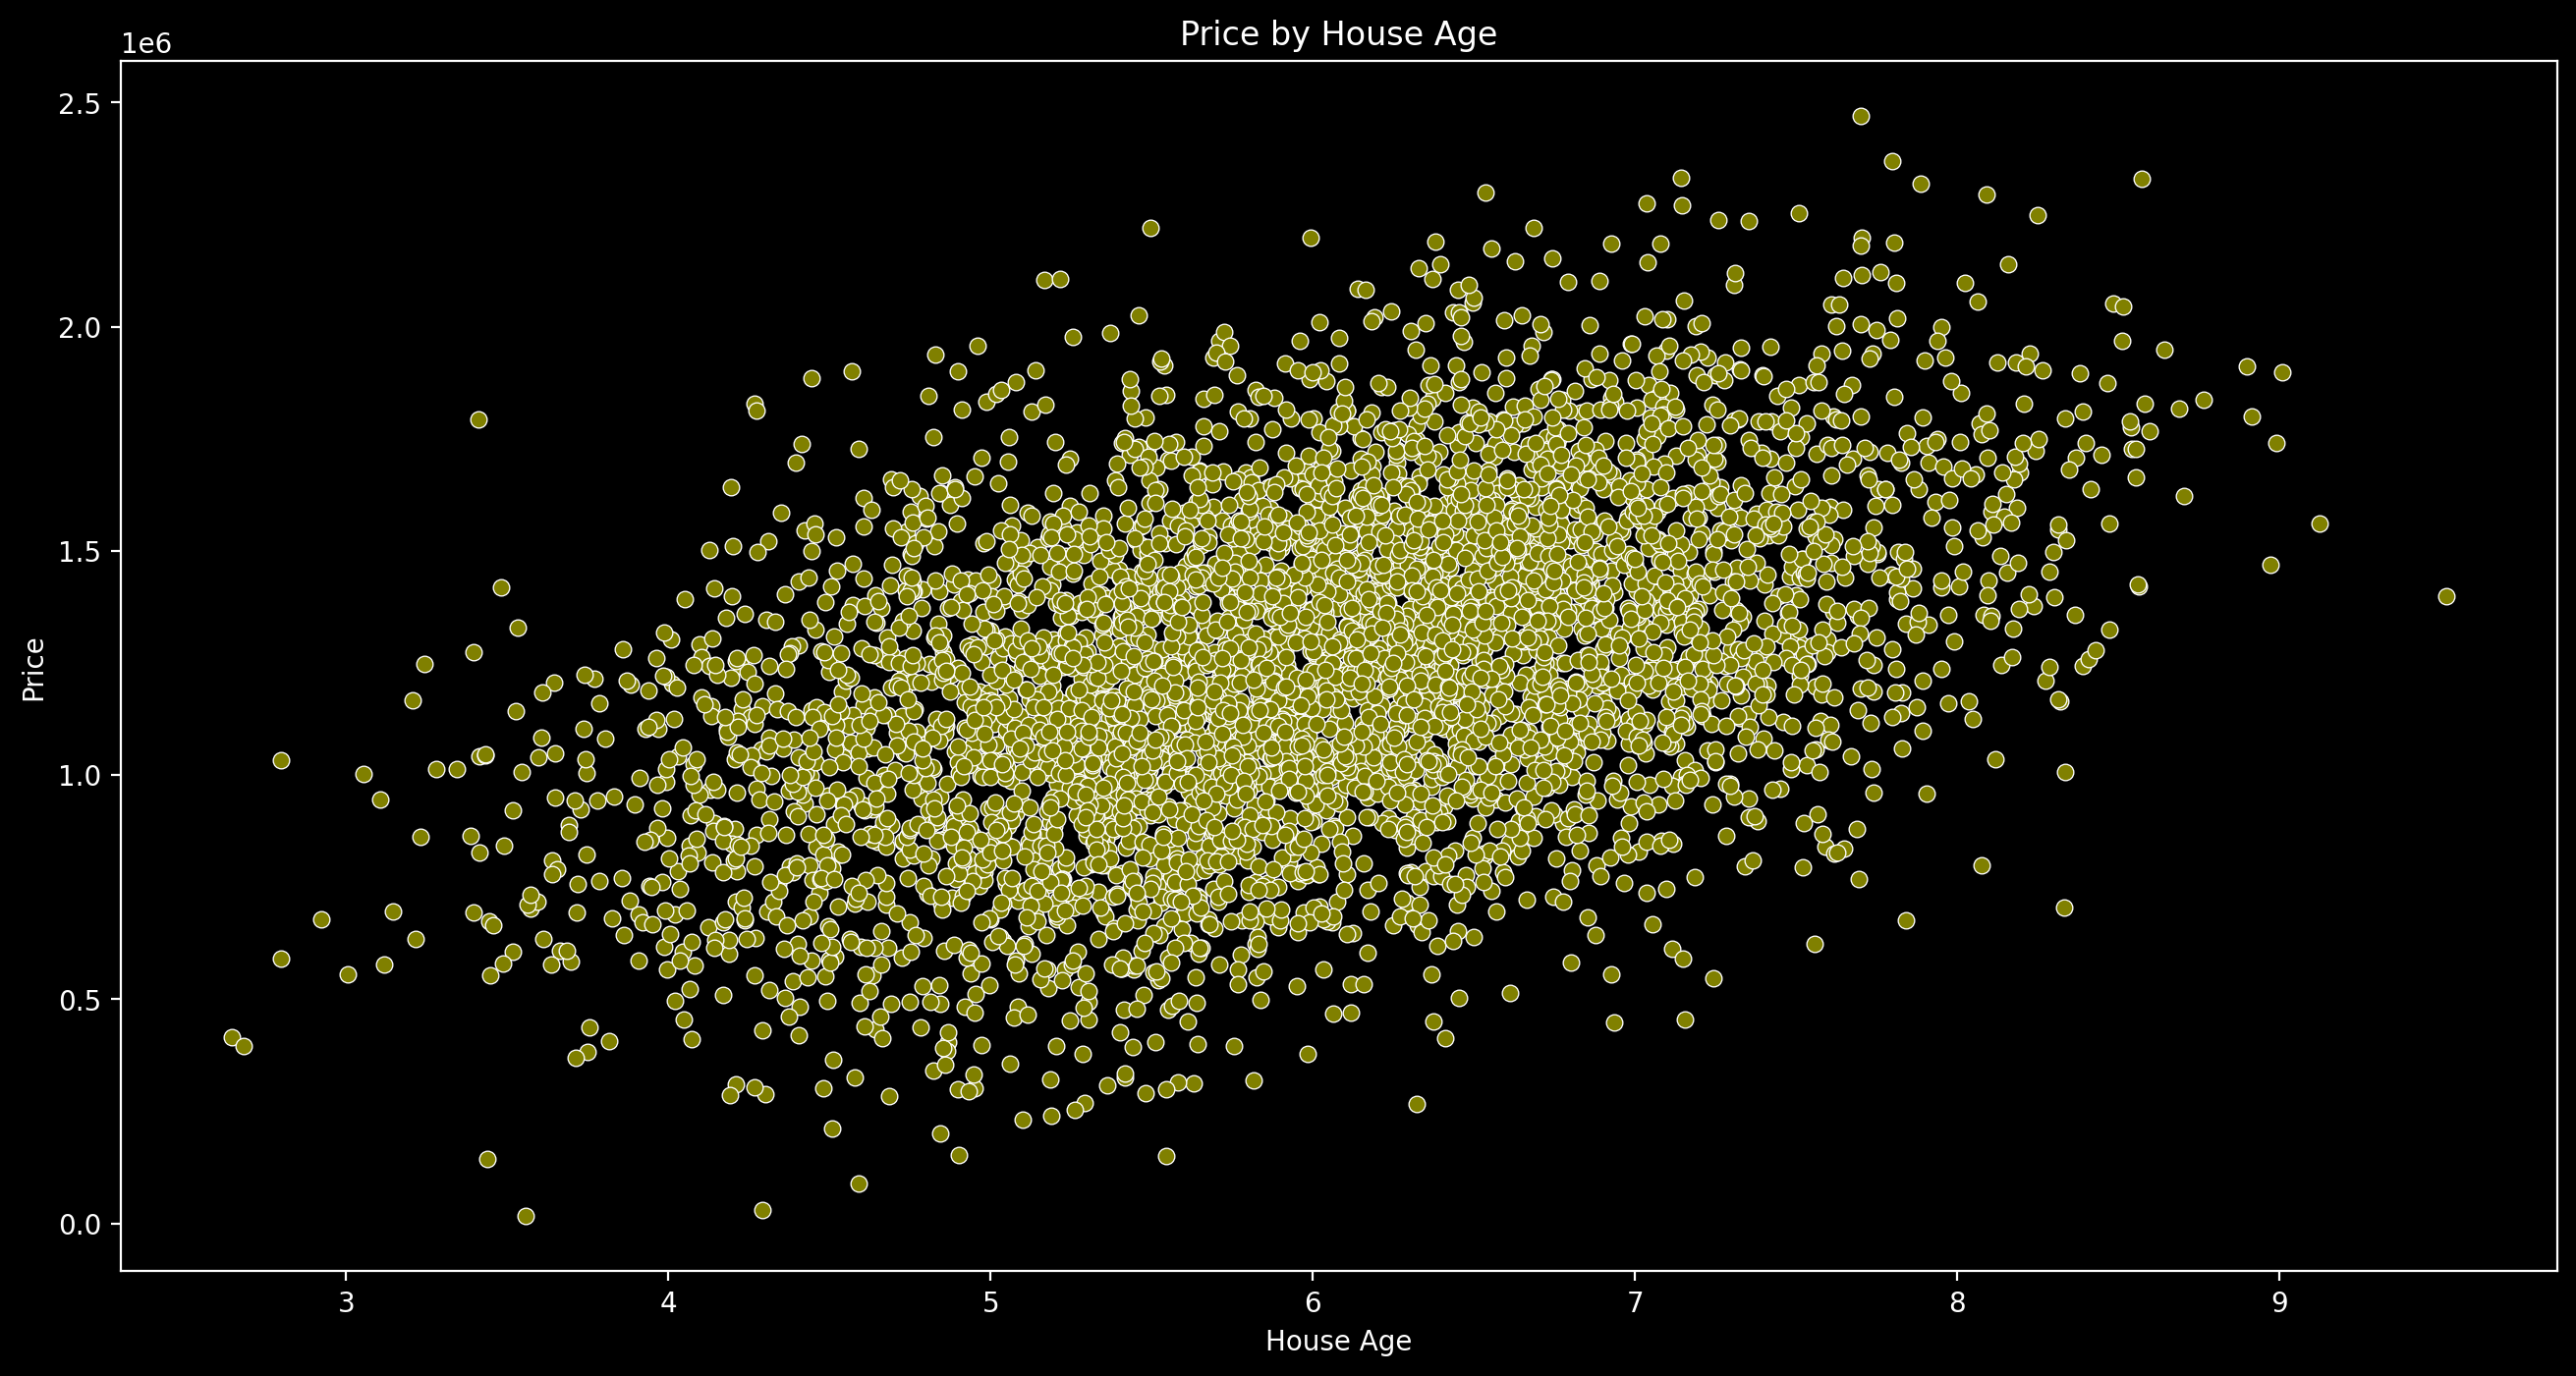

In [22]:
# Price by House Age
plt.figure(figsize = (16, 8), dpi = 200)
ax = sns.scatterplot('House Age', 'Price', data = df, color = 'olive', ci = None)
plt.title('Price by House Age')
plt.show()

In [23]:
df.head()

Income  House Age  Number of Rooms  Number of Bedrooms  \
0  79545.458574   5.682861         7.009188                4.09   
1  79248.642455   6.002900         6.730821                3.09   
2  61287.067179   5.865890         8.512727                5.13   
3  63345.240046   7.188236         5.586729                3.26   
4  59982.197226   5.040555         7.839388                4.23   

   Area Population         Price State  
0     23086.800503  1.059034e+06    NE  
1     40173.072174  1.505891e+06    CA  
2     36882.159400  1.058988e+06    WI  
3     34310.242831  1.260617e+06    AP  
4     26354.109472  6.309435e+05    AE

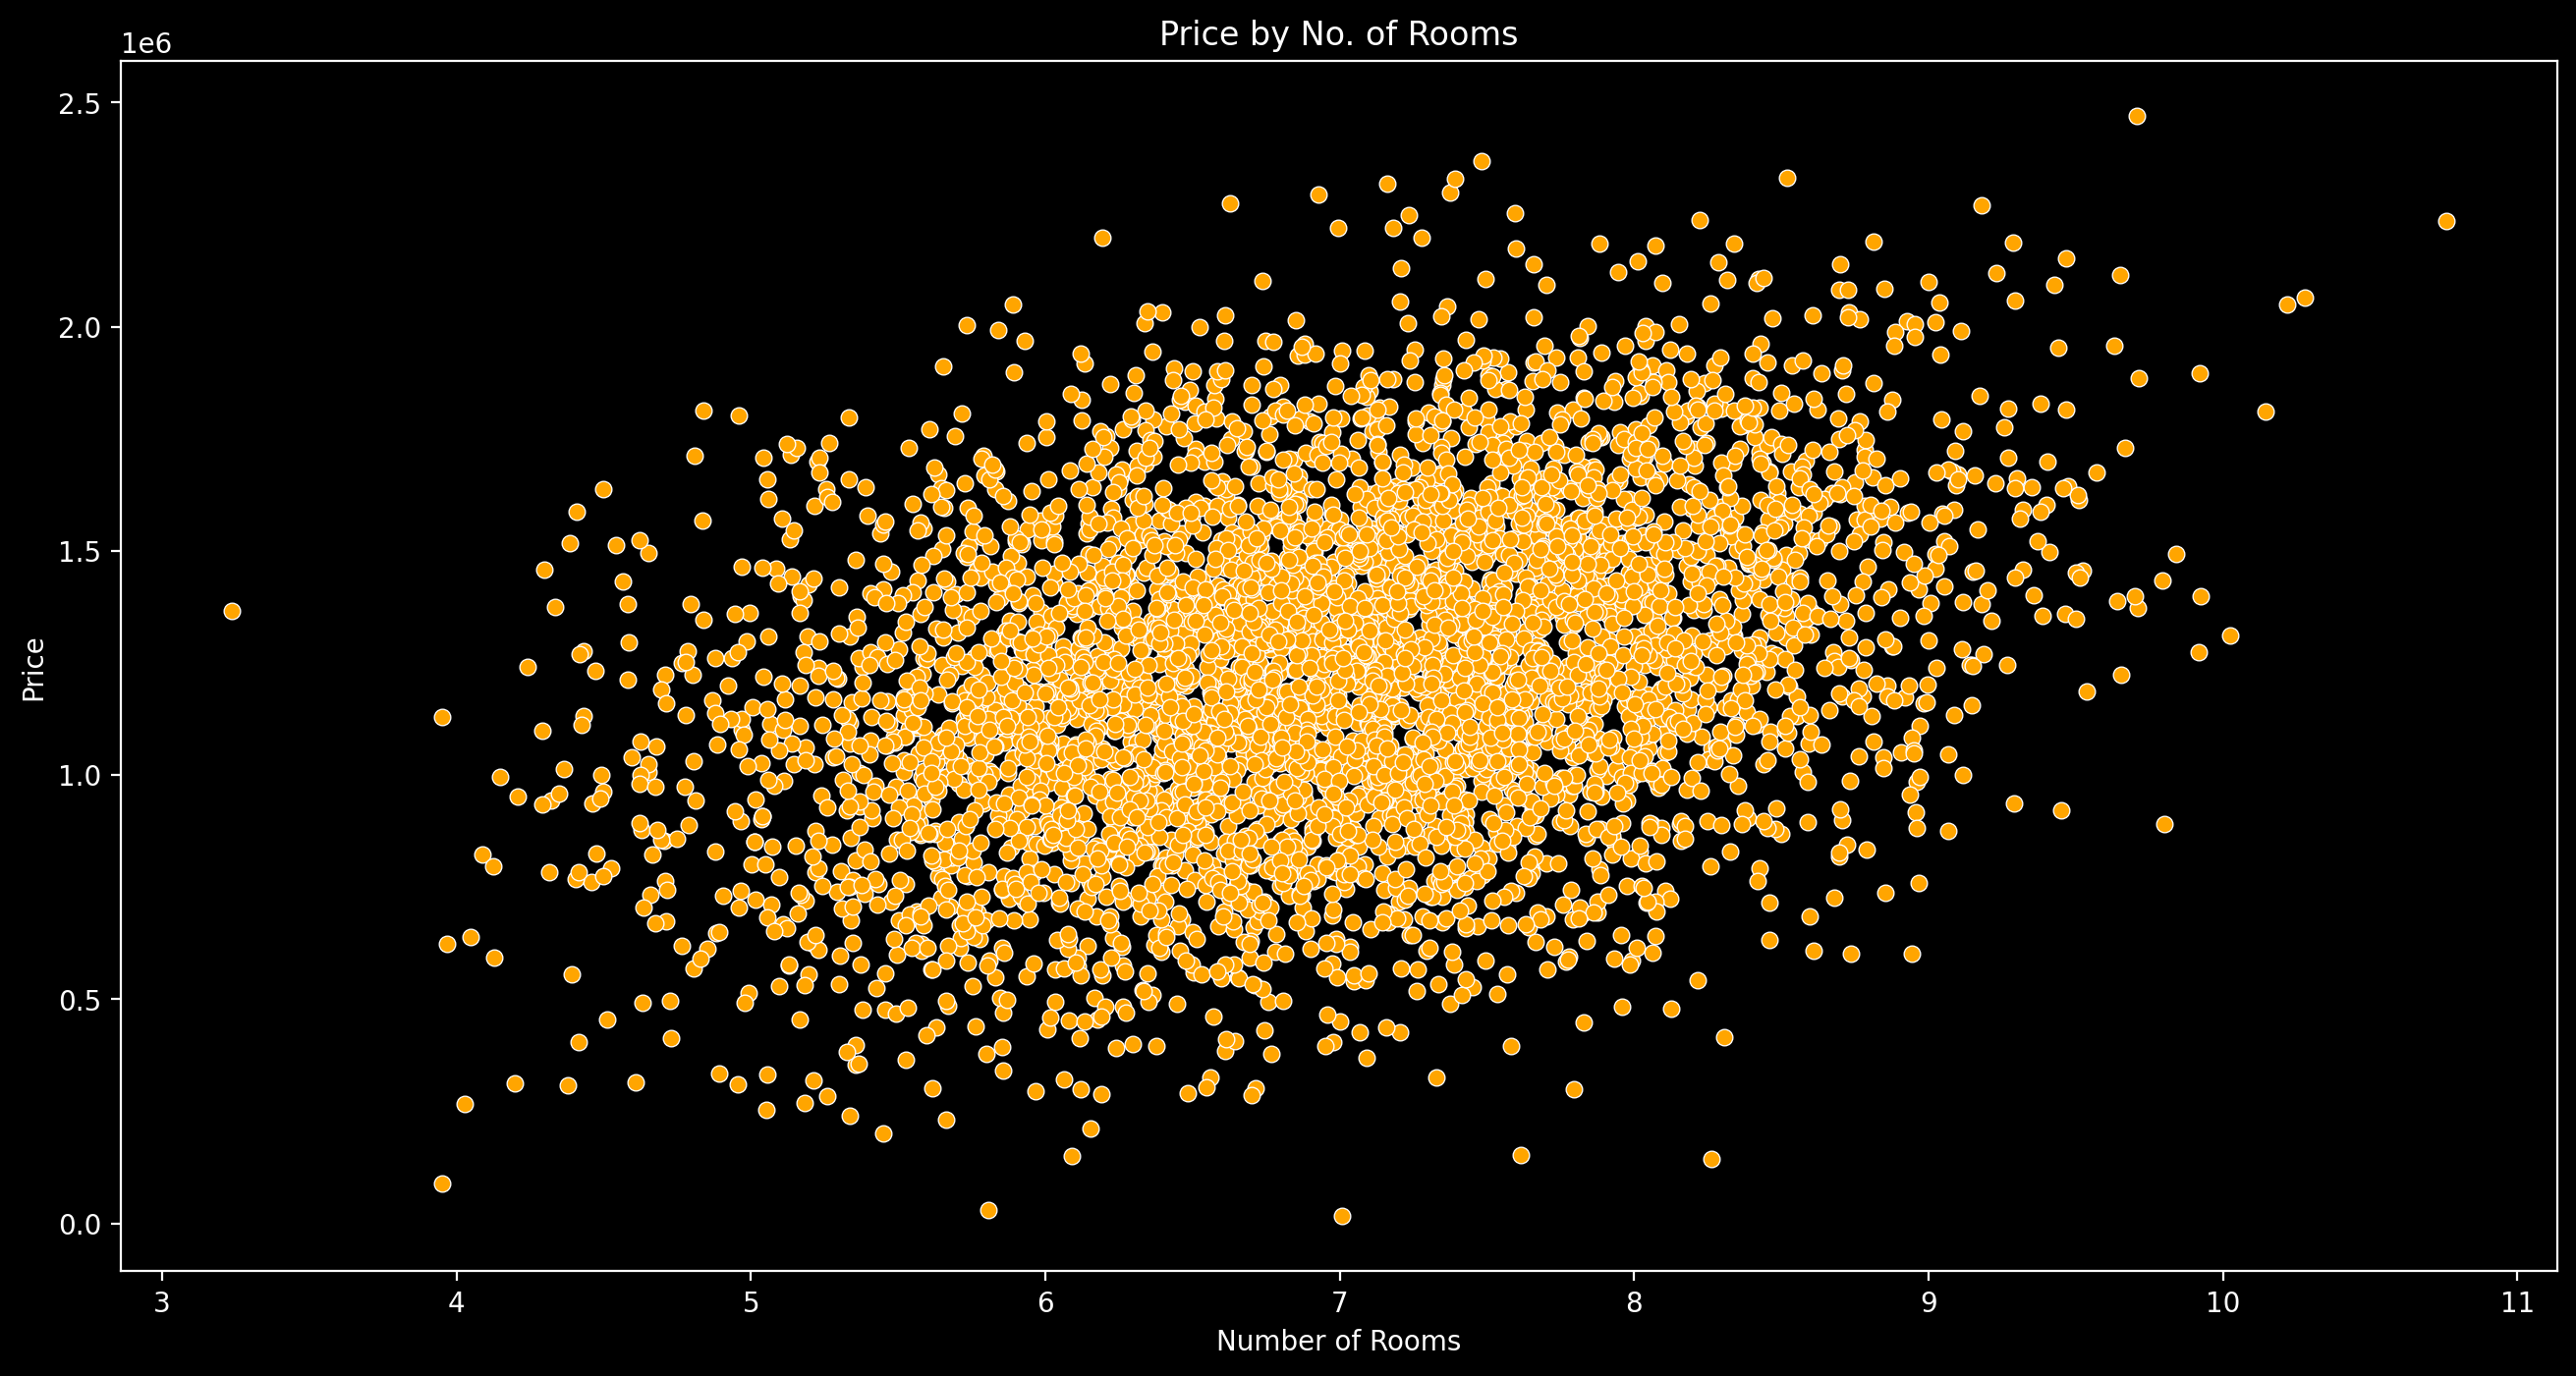

In [24]:
# Price by No. of Rooms
plt.figure(figsize = (16, 8), dpi = 200)
sns.scatterplot('Number of Rooms', 'Price', data = df, color = 'orange')
plt.title('Price by No. of Rooms')
plt.show()

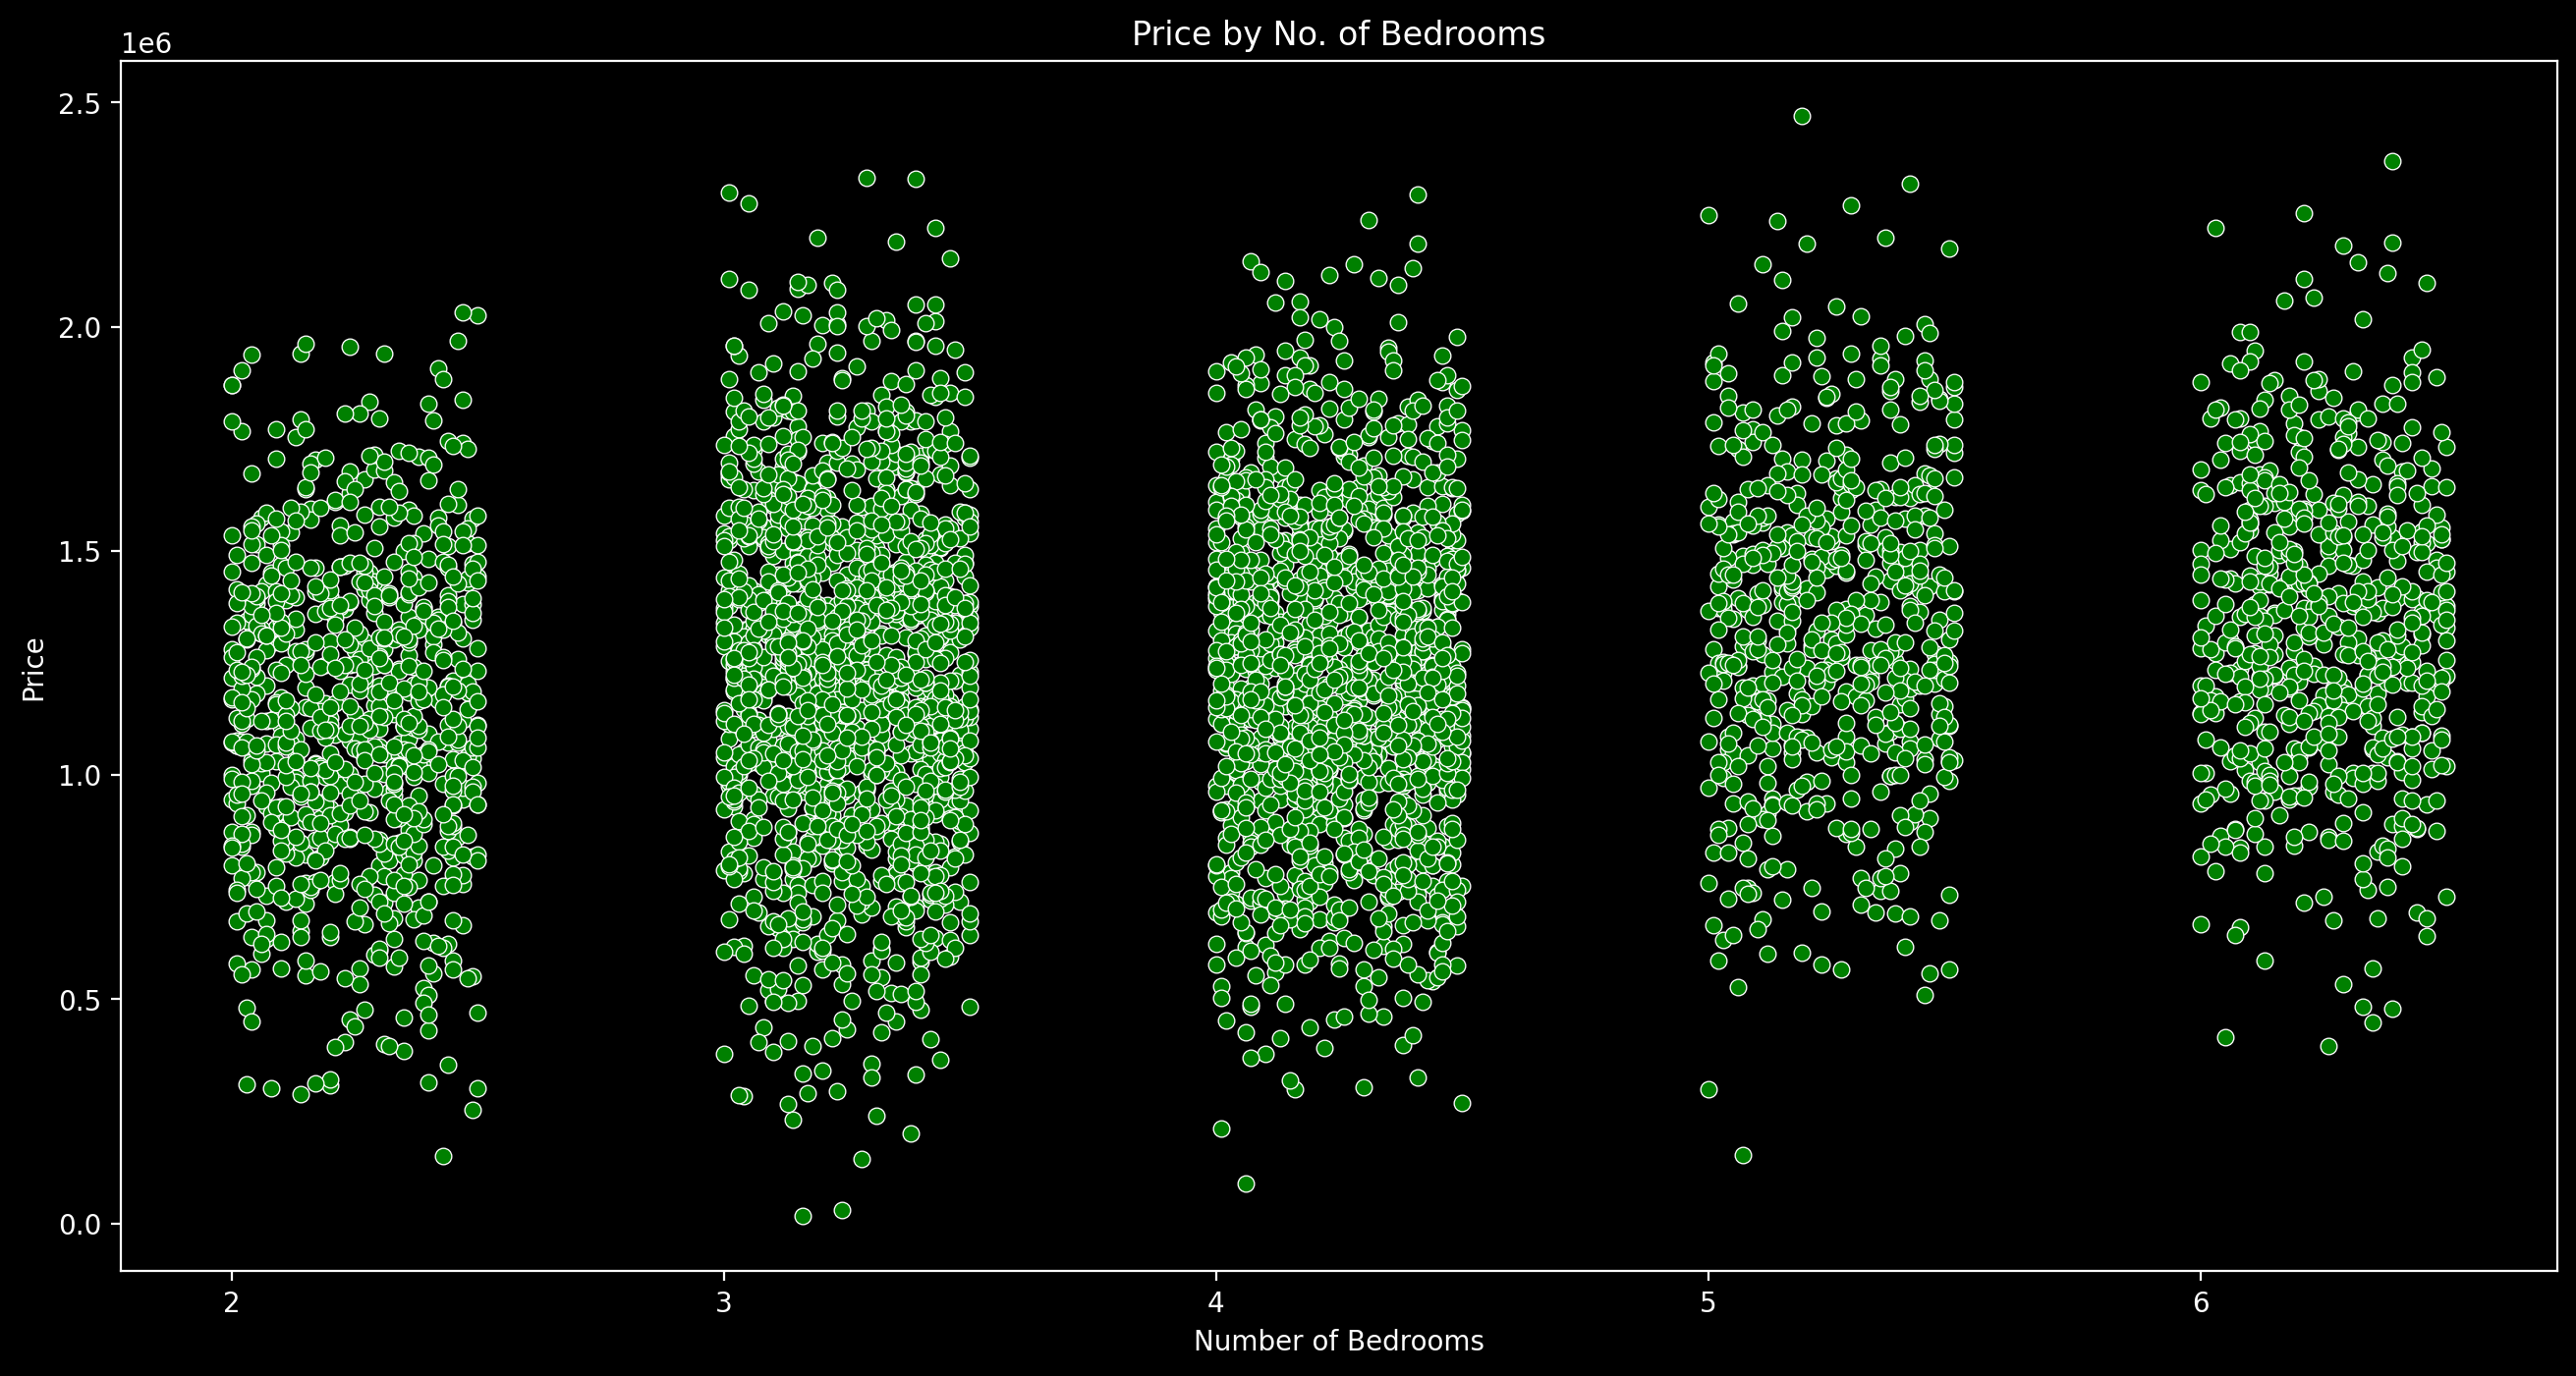

In [25]:
# Price by No.of Bedrooms
plt.figure(figsize = (16, 8), dpi = 200)
sns.scatterplot('Number of Bedrooms', 'Price', data = df, color = 'green', ci = None)
plt.title('Price by No. of Bedrooms')
plt.show()

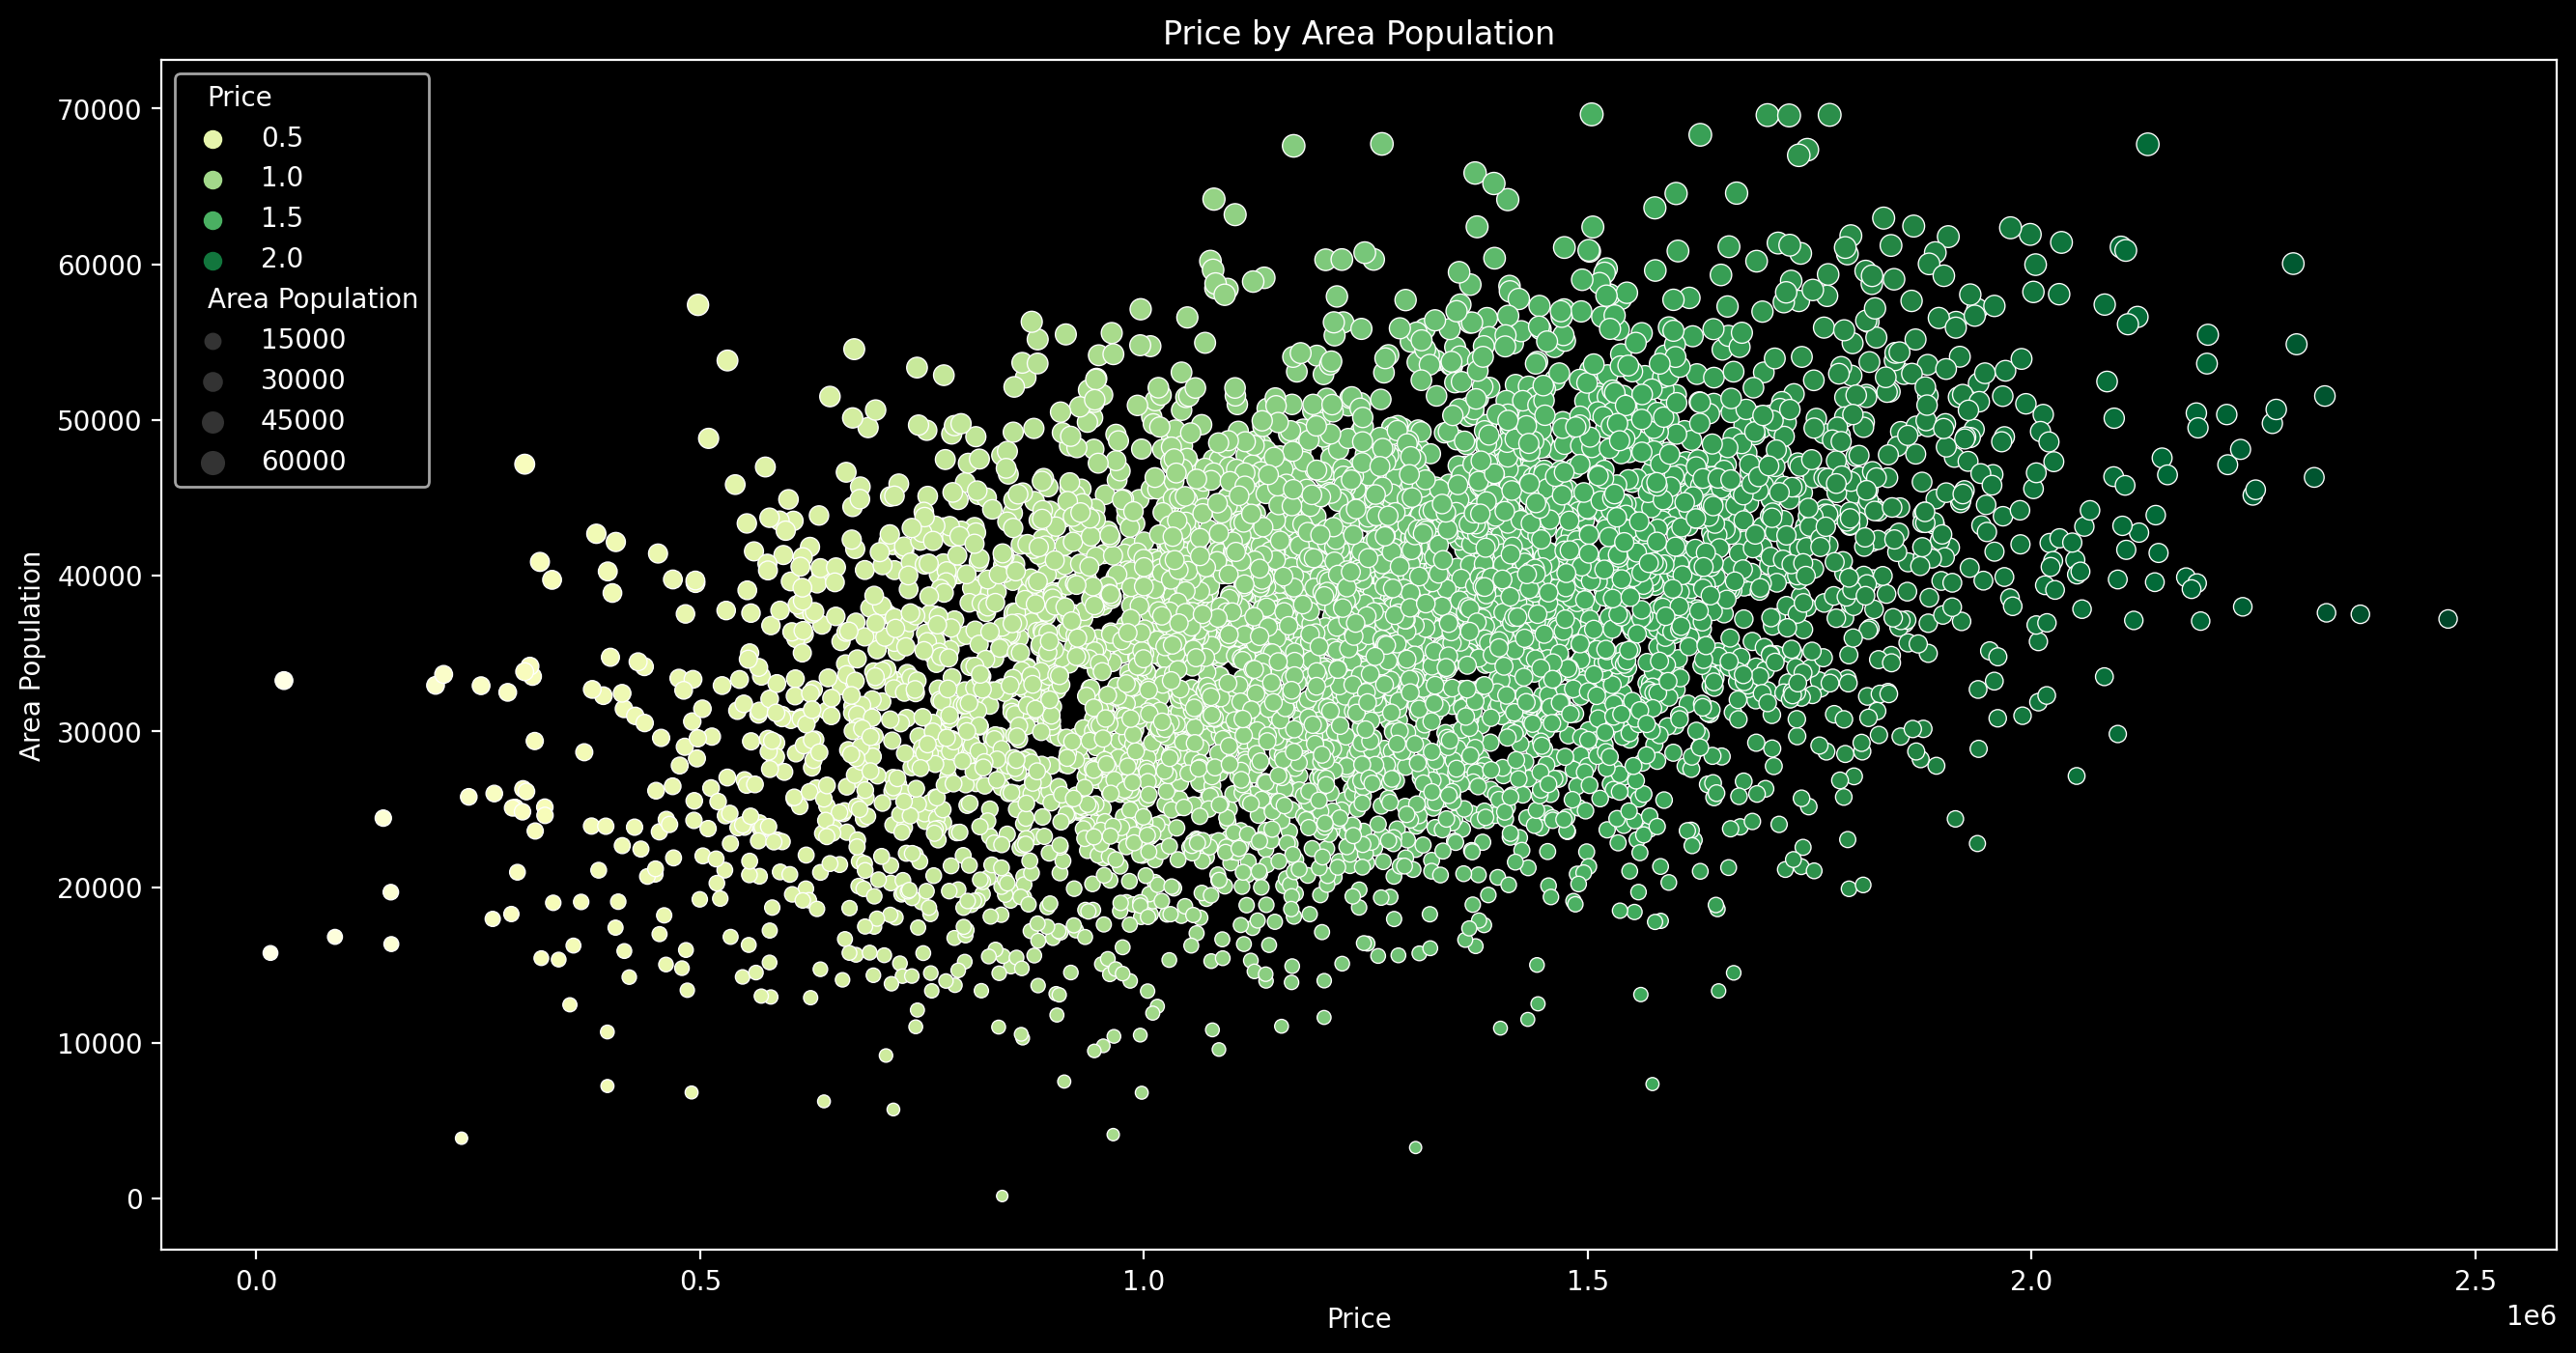

In [26]:
# Price by Area Population
plt.figure(figsize = (16, 8), dpi = 200)
ax = sns.scatterplot('Price', 'Area Population',  data = df, size = 'Area Population', hue = 'Price', palette = 'YlGn')
plt.title('Price by Area Population')
plt.show()

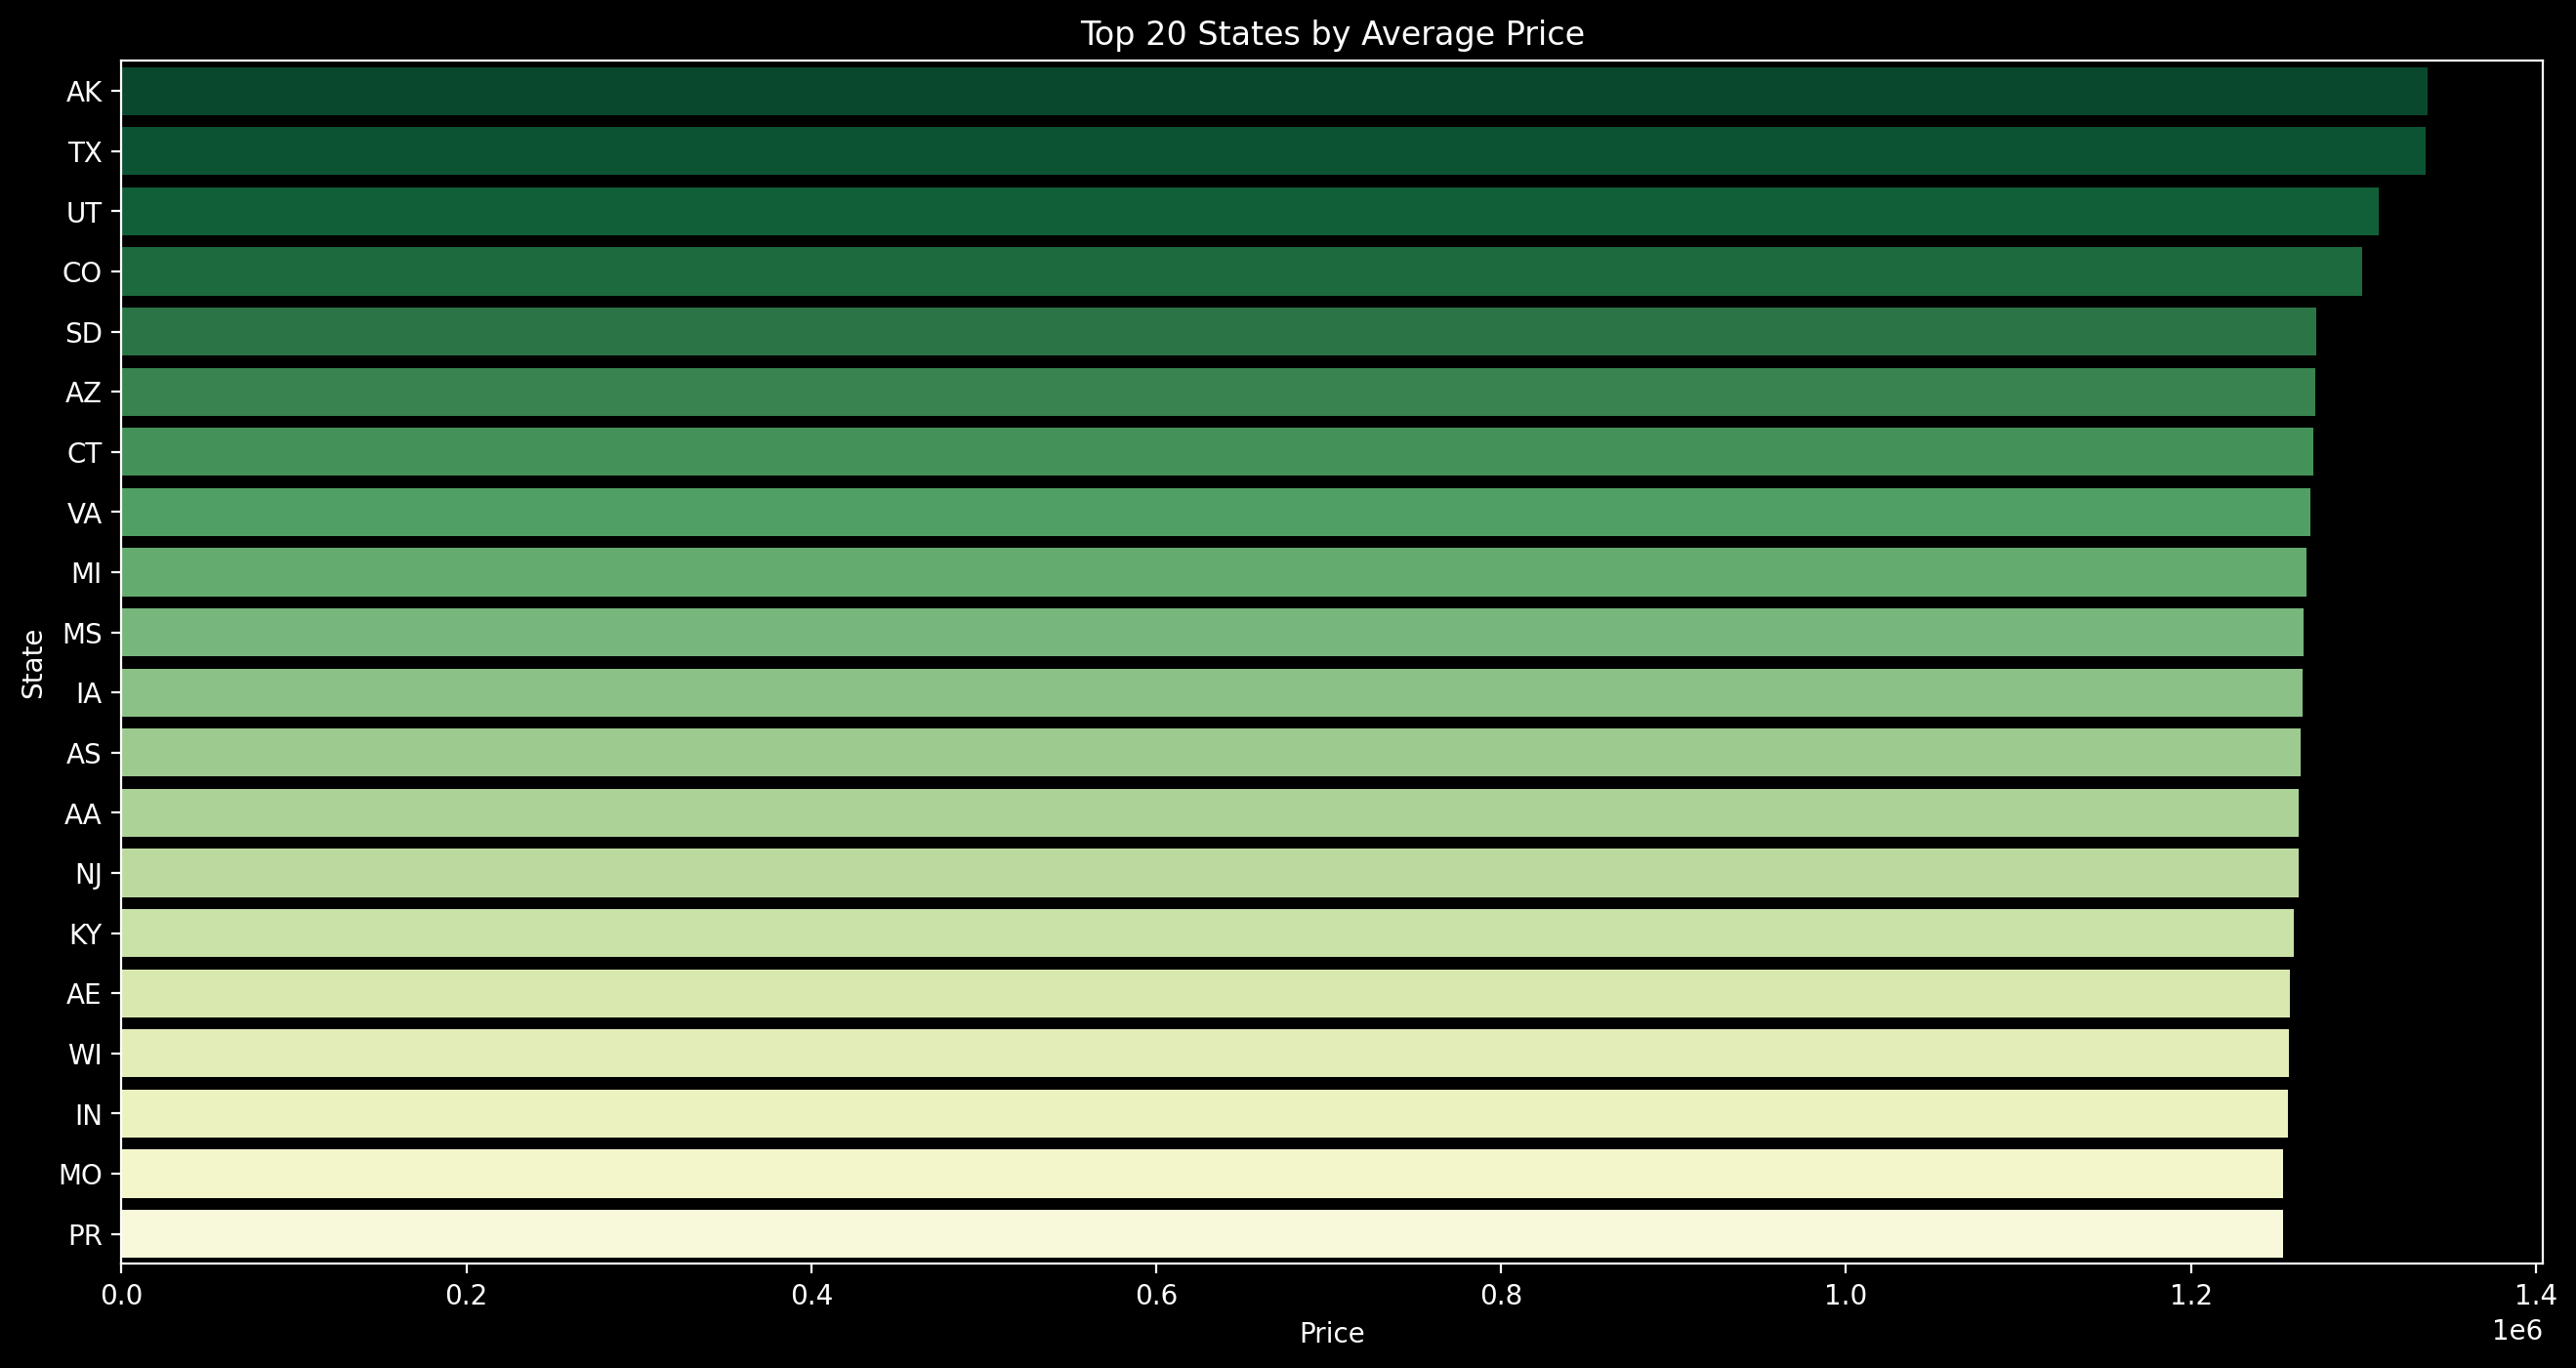

In [27]:
# Price by State
order = df.groupby('State')['Price'].mean().sort_values(ascending = False)[:20]
plt.figure(figsize = (16, 8), dpi = 200)
ax = sns.barplot('Price', 'State', data = df, palette = 'YlGn_r', ci = None, order = order.index)
plt.title('Top 20 States by Average Price')
plt.show()

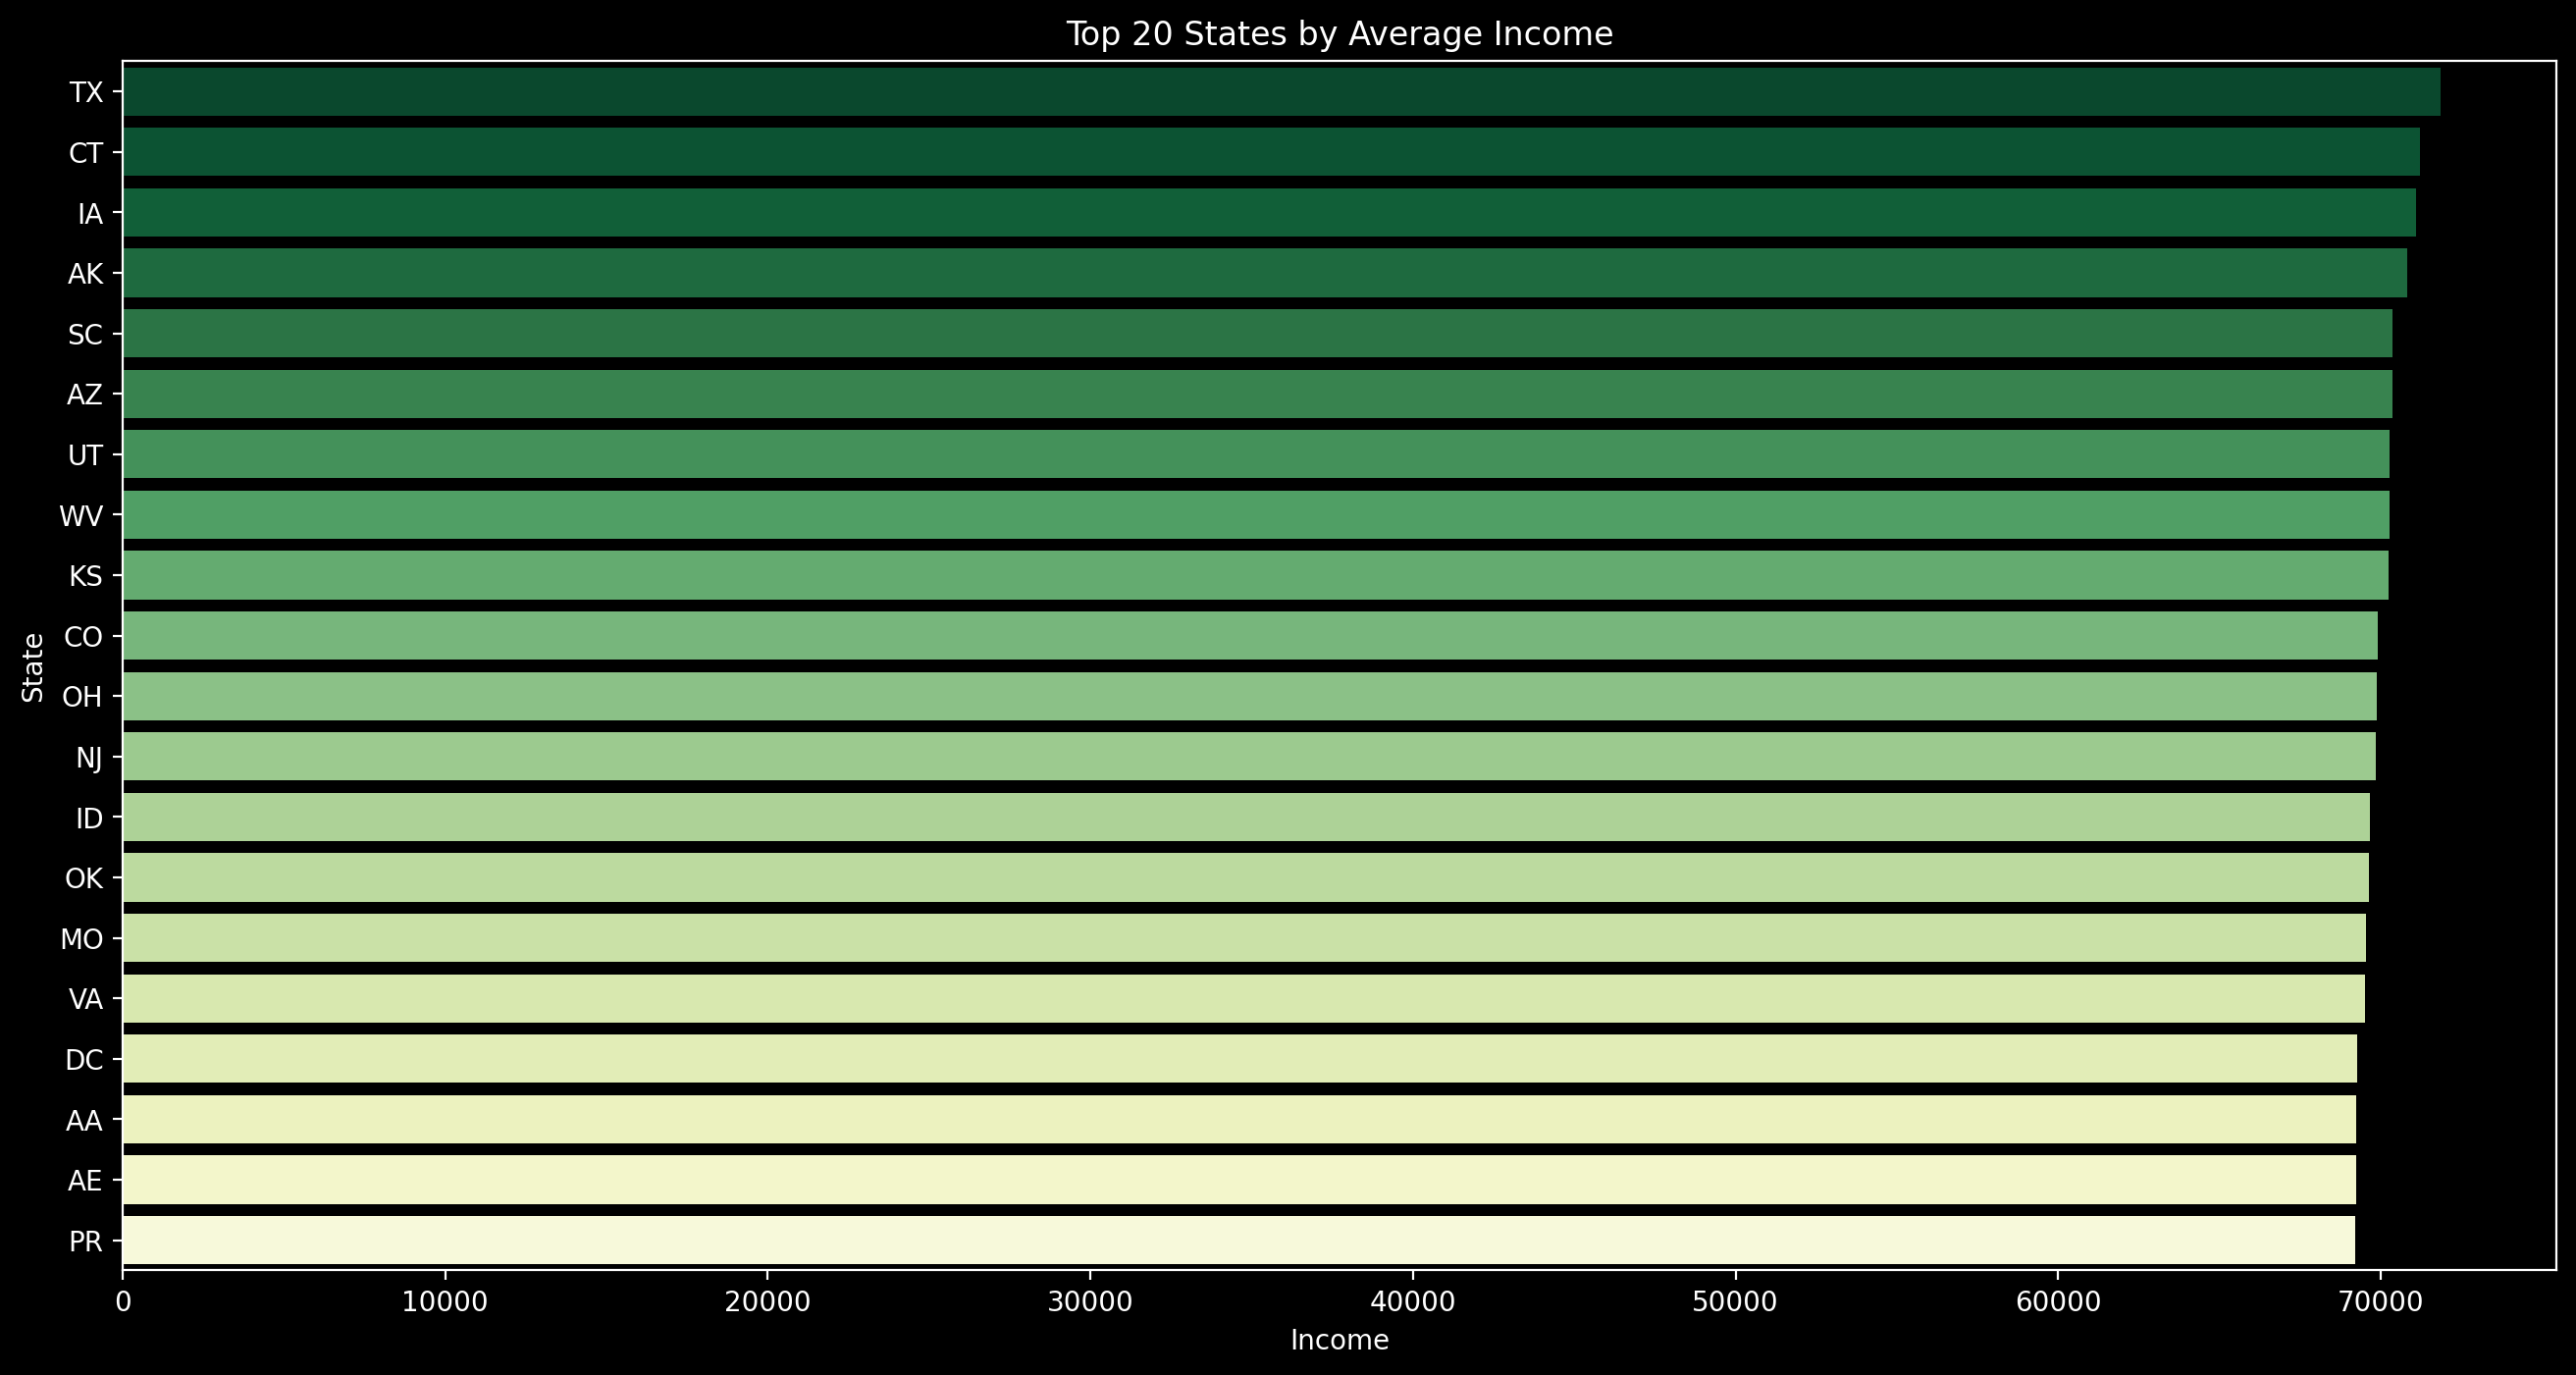

In [28]:
# Income by State
plt.figure(figsize = (16, 8), dpi = 200)
order = df.groupby('State').mean()['Income'].sort_values(ascending = False)[:20]
ax = sns.barplot('Income', 'State', data = df, palette = 'YlGn_r', ci = None, order = order.index)
plt.title('Top 20 States by Average Income')
plt.show()

In [29]:
df.head()

Income  House Age  Number of Rooms  Number of Bedrooms  \
0  79545.458574   5.682861         7.009188                4.09   
1  79248.642455   6.002900         6.730821                3.09   
2  61287.067179   5.865890         8.512727                5.13   
3  63345.240046   7.188236         5.586729                3.26   
4  59982.197226   5.040555         7.839388                4.23   

   Area Population         Price State  
0     23086.800503  1.059034e+06    NE  
1     40173.072174  1.505891e+06    CA  
2     36882.159400  1.058988e+06    WI  
3     34310.242831  1.260617e+06    AP  
4     26354.109472  6.309435e+05    AE

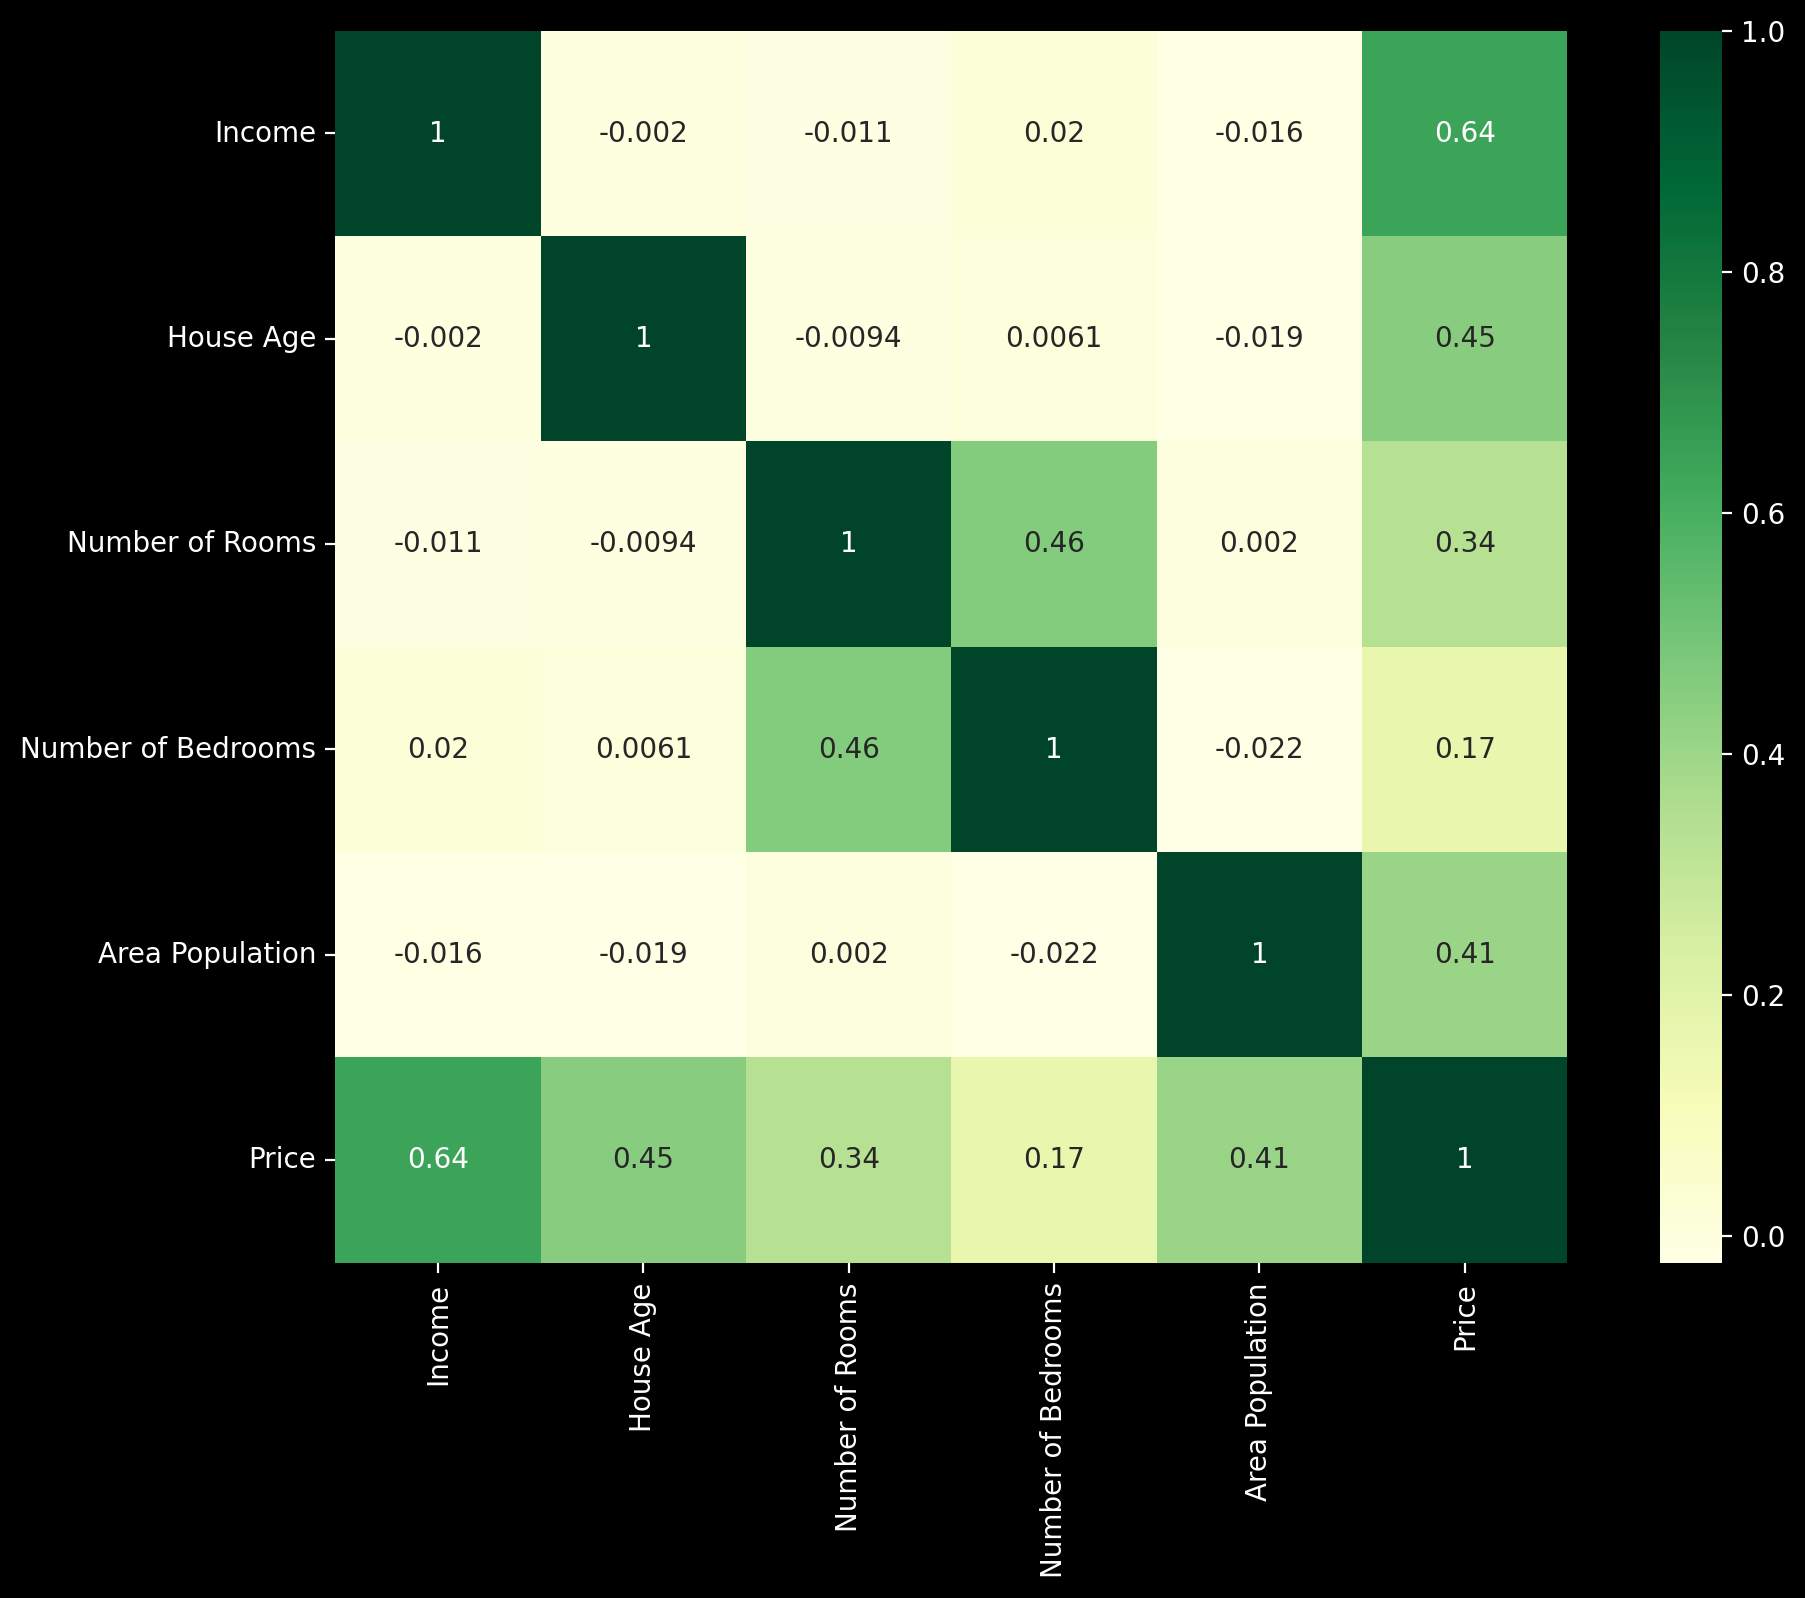

In [30]:
plt.figure(figsize = (12, 8), dpi = 200)
sns.heatmap(df.corr(), annot = True, square = True, cmap = 'YlGn')
plt.show()

In [31]:
df.head()

Income  House Age  Number of Rooms  Number of Bedrooms  \
0  79545.458574   5.682861         7.009188                4.09   
1  79248.642455   6.002900         6.730821                3.09   
2  61287.067179   5.865890         8.512727                5.13   
3  63345.240046   7.188236         5.586729                3.26   
4  59982.197226   5.040555         7.839388                4.23   

   Area Population         Price State  
0     23086.800503  1.059034e+06    NE  
1     40173.072174  1.505891e+06    CA  
2     36882.159400  1.058988e+06    WI  
3     34310.242831  1.260617e+06    AP  
4     26354.109472  6.309435e+05    AE

In [32]:
X = df.drop(['Price'], axis = 1)
Y = df['Price']

In [33]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X[['State']] = encoder.fit_transform(X[['State']])

In [34]:
X.head()

Income  House Age  Number of Rooms  Number of Bedrooms  \
0  79545.458574   5.682861         7.009188                4.09   
1  79248.642455   6.002900         6.730821                3.09   
2  61287.067179   5.865890         8.512727                5.13   
3  63345.240046   7.188236         5.586729                3.26   
4  59982.197226   5.040555         7.839388                4.23   

   Area Population  State  
0     23086.800503   37.0  
1     40173.072174    8.0  
2     36882.159400   59.0  
3     34310.242831    4.0  
4     26354.109472    1.0

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [35]:
Y = df[['Price']].values

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = .25, random_state = 100)

In [37]:
print('Training df Set    : ', x_train.shape)
print('Training Label Set : ', y_train.shape)
print('Testing df Set     : ', x_test.shape)
print('Testing Label Set  : ', y_test.shape)

Training df Set    :  (3750, 6)
Training Label Set :  (3750, 1)
Testing df Set     :  (1250, 6)
Testing Label Set  :  (1250, 1)


## Linear Regression

In [38]:
from sklearn.metrics import r2_score

In [39]:
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression()
lr_regressor.fit(x_train, y_train)

lr_pred_train = lr_regressor.predict(x_train)
lr_pred_test  = lr_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, lr_pred_train))
print('Testing Set Score  : ', r2_score(y_test, lr_pred_test))

Training Set Score :  0.91736822048994
Testing Set Score  :  0.9198081598090116


### SGD Regressor

In [40]:
from sklearn.linear_model import SGDRegressor
sg_regressor = SGDRegressor(alpha = 0.005)
sg_regressor.fit(x_train, y_train)

sg_pred_train = sg_regressor.predict(x_train)
sg_pred_test  = sg_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, sg_pred_train))
print('Testing Set Score  : ', r2_score(y_test, sg_pred_test))

Training Set Score :  -1.0090689068025628e+24
Testing Set Score  :  -9.771334214546824e+23


In [41]:
sg_regressor.coef_

array([ 3.14815222e+12, -3.79591962e+10, -1.94417971e+11, -1.70446832e+11,
        3.70159683e+12, -2.09673205e+11])

In [42]:
sg_regressor.intercept_

array([-5.9510108e+10])

## Polynomial Regression


In [43]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
x_poly3_train = poly.fit_transform(x_train)
x_poly3_test = poly.fit_transform(x_test)

In [44]:
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3_train, y_train)

poly3_pred_train = poly_reg3.predict(x_poly3_train)
poly3_pred_test  = poly_reg3.predict(x_poly3_test)

print('Training Set Score : ', r2_score(y_train, poly3_pred_train))
print('Testing Set Score  : ', r2_score(y_test, poly3_pred_test))

Training Set Score :  0.8914782703163564
Testing Set Score  :  0.8862302597494434


## Decision Trees


In [45]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(max_depth = 100, random_state = 100)
dt_regressor.fit(x_train, y_train)

dt_pred_train = dt_regressor.predict(x_train)
dt_pred_test  = dt_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, dt_pred_train))
print('Testing Set Score  : ', r2_score(y_test, dt_pred_test))

Training Set Score :  1.0
Testing Set Score  :  0.7293291593158759


## Random Forest Regressor

In [46]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 1000, max_depth = 1000, random_state = 42)
rf_regressor.fit(x_train, y_train)

rf_pred_train = rf_regressor.predict(x_train)
rf_pred_test = rf_regressor.predict(x_test)

print('Training Set Score : ', r2_score(y_train, rf_pred_train))
print('Testing Set Score  : ', r2_score(y_test, rf_pred_test))

Training Set Score :  0.9841869835585749
Testing Set Score  :  0.8832231532206986


## XGBoost Regressor


In [47]:
from xgboost import XGBRegressor
xg_regressor = XGBRegressor(n_estimators = 100, max_depth = 200, random_state = 42)
xg_regressor.fit(x_train, y_train)

xg_train_pred = xg_regressor.predict(x_train)
xg_test_pred = xg_regressor.predict(x_test)

print('Training set score : ', r2_score(y_train, xg_train_pred))
print('Testing set score  : ', r2_score(y_test, xg_test_pred))

Training set score :  0.9999999999998662
Testing set score  :  0.8707769541224704


## LightGBM Regressor

In [48]:
from lightgbm import LGBMRegressor
lg_regressor = LGBMRegressor(n_estimators = 100)
lg_regressor.fit(x_train, y_train)

lg_train_pred = lg_regressor.predict(x_train)
lg_test_pred = lg_regressor.predict(x_test)

print('Training set score : ', r2_score(y_train, lg_train_pred))
print('Testing set score  : ', r2_score(y_test, lg_test_pred))

Training set score :  0.9547102786476473
Testing set score  :  0.9015146144728472


## Adaboost Regressor

In [49]:
estimator = DecisionTreeRegressor(max_depth = 1000)

from sklearn.ensemble import AdaBoostRegressor
ad_regressor = AdaBoostRegressor(estimator, n_estimators = 500)
ad_regressor.fit(x_train, y_train)

ad_train_pred = ad_regressor.predict(x_train)
ad_test_pred = ad_regressor.predict(x_test)

print('Training set score : ', r2_score(y_train, ad_train_pred))
print('Testing set score  : ', r2_score(y_test, ad_test_pred))

Training set score :  0.9999859360068771
Testing set score  :  0.8836355680461965


## Stacking Ensemble

In [50]:
from sklearn.ensemble import VotingRegressor
vt_regressor = VotingRegressor(estimators = [('lr', lr_regressor),
                                            
                                             ('po', poly_reg3),
                                               ('dt', dt_regressor),
                                               ('rf', rf_regressor),
                                               ('xg', xg_regressor),
                                               ('lg', lg_regressor),
                                               ('ad', ad_regressor)])

vt_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('po', LinearRegression()),
                            ('dt',
                             DecisionTreeRegressor(max_depth=100,
                                                   random_state=100)),
                            ('rf',
                             RandomForestRegressor(max_depth=1000,
                                                   n_estimators=1000,
                                                   random_state=42)),
                            ('xg',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,...
                                          max_cat_threshold=None,
                                          m

In [51]:
vt_pred_train = vt_regressor.predict(x_train)
vt_pred_test = vt_regressor.predict(x_test)

print('Training Set Score :', r2_score(y_train, vt_pred_train))
print('Testing Set Score  :', r2_score(y_test, vt_pred_test))

Training Set Score : 0.9840421987571206
Testing Set Score  : 0.9029990724354987
